<a href="https://colab.research.google.com/github/Soni-Aditi/Binary-Classification-Autism-Detection/blob/main/ProjectNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Loading the colab essentials

## Mounting Drive

In [ ]:
#Loading the colab essentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Installing some library


In [ ]:
!pip install boruta

     |████████████████████████████████| 61kB 7.1MB/s 


##Loading the Important Library

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
# For missing values visualization
import missingno as msno
# For Plots
import matplotlib.pyplot as plt
import seaborn as sns
# For printing outputs in a beautiful way
from pprint import pprint
# For Normalization
from sklearn.preprocessing import MinMaxScaler
# For confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
# For cross validation
from sklearn.model_selection import cross_val_score
# For F_beta score
from sklearn.metrics import fbeta_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# For Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# For splitting the Data into test and train
from sklearn.model_selection import train_test_split
# For feature Selection Boruta
from boruta import BorutaPy
# For F-beta
from sklearn.metrics import fbeta_score, make_scorer
# for legends
import matplotlib.patches as mpatches

## MatplotLib Settings

In [ ]:
%matplotlib inline
plt.style.use('seaborn')
sns.set(style="whitegrid", color_codes=True)

In [ ]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



---
# Load  Raw Data

## Child

In [ ]:
child_Data = pd.read_csv("./RawData/child.csv",na_values=['?'])

## Adult

In [ ]:
adult_Data = pd.read_csv("./RawData/adult.csv",na_values=['?'])

##Adol

In [ ]:
adol_Data = pd.read_csv("./RawData/adol.csv",na_values=['?'])



---


# Data Description

## child_Data

### Pandas info

In [ ]:
child_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  contry_of_res    292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          


From the above we get the following information: 
1.   The number of the independent variables, names of these variables and also about the dependent variable.
2.   We also get the information regarding the number of instances we have for each variable.
3.   At last we get the idea of the Data type of each variables we are dealing with.



### Frequency vs Columns 

In [ ]:
child_freq = child_Data.count()
child_freq

A1_Score           292
A2_Score           292
A3_Score           292
A4_Score           292
A5_Score           292
A6_Score           292
A7_Score           292
A8_Score           292
A9_Score           292
A10_Score          292
age                288
gender             292
ethnicity          249
jundice            292
austim             292
contry_of_res      292
used_app_before    292
result             292
age_desc           292
relation           249
Class/ASD          292
dtype: int64

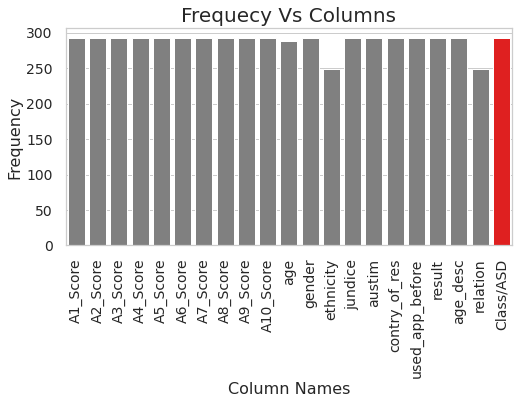

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != "Class/ASD") else 'red' for x in child_freq.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Frequency")
ax.set_title("Frequecy Vs Columns")
graph=sns.barplot(x=child_freq.index, y = child_freq.values,ax=ax,palette=clrs)
# for p in graph.patches:
#     graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
#                 ha='center', va='bottom',
#                 color= 'black')
plt.show()

From the above barplot we get the following information about the dataset: 

1.   It can be observed that there are some missing values in our data.
2.   Perhaps, Our next step must be to find the number of missing values in these columns and do the necessary to make the data consistent.



### Missing Values

In [ ]:
missing_values_child = child_Data.isnull().sum()
missing_values_child

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

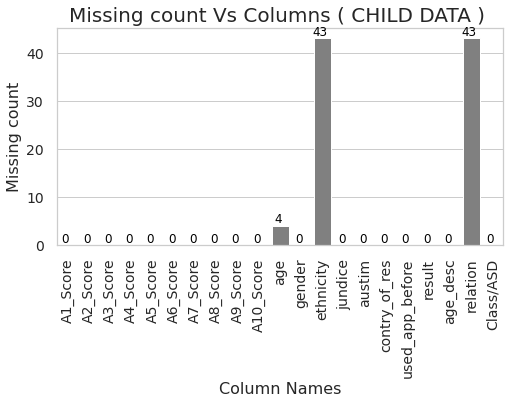

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != 'Class/ASD') else 'red' for x in missing_values_child.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Missing count")
ax.set_title("Missing count Vs Columns ( CHILD DATA ) ")
graph=sns.barplot(x=missing_values_child.index, y = missing_values_child.values,ax=ax,palette=clrs)
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                ha='center', va='bottom',
                color= 'black')
plt.show()

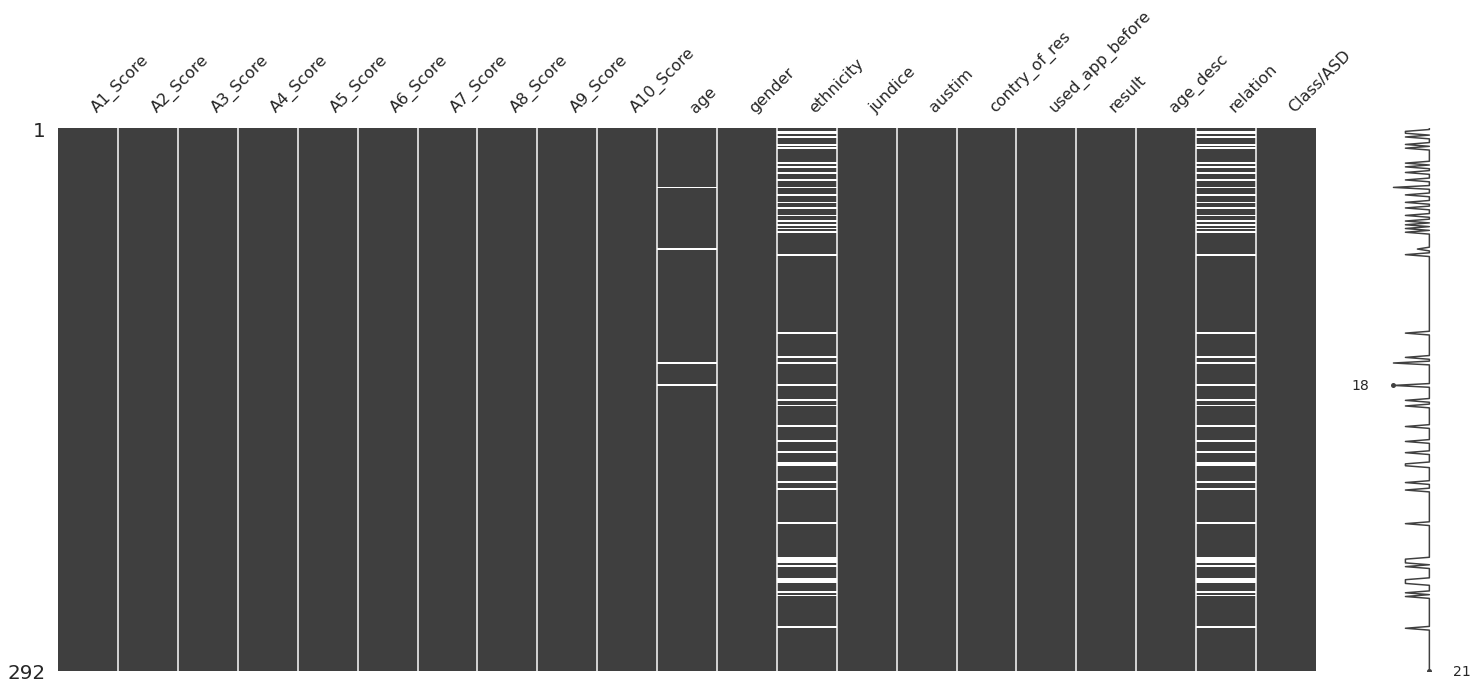

In [ ]:
msno.matrix(child_Data)

From the above plot we got the count of the missing values in the column `age`, `relation`, `ethnicity`. Inorder, to handle these missing values we need to first sort these variable into  **Categorical** , **Discrete** or **Continuous** variables

### Attribute Type: `Categorical` , `Discrete`,`Binary`or `Continuous`

In [ ]:
for x in child_Data.columns:
    print("-"*100)
    print(x," : ",child_Data[x].unique())

----------------------------------------------------------------------------------------------------
A1_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A2_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A3_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A4_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A5_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A6_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A7_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A8_Score  :  [1 0]
----------------------------------------

"*Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Child) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. "*

**Above subtext and Below Table has been taken from the description file that was floated along with the dataset that was downloaded from the UCI website : [https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++](https://)**

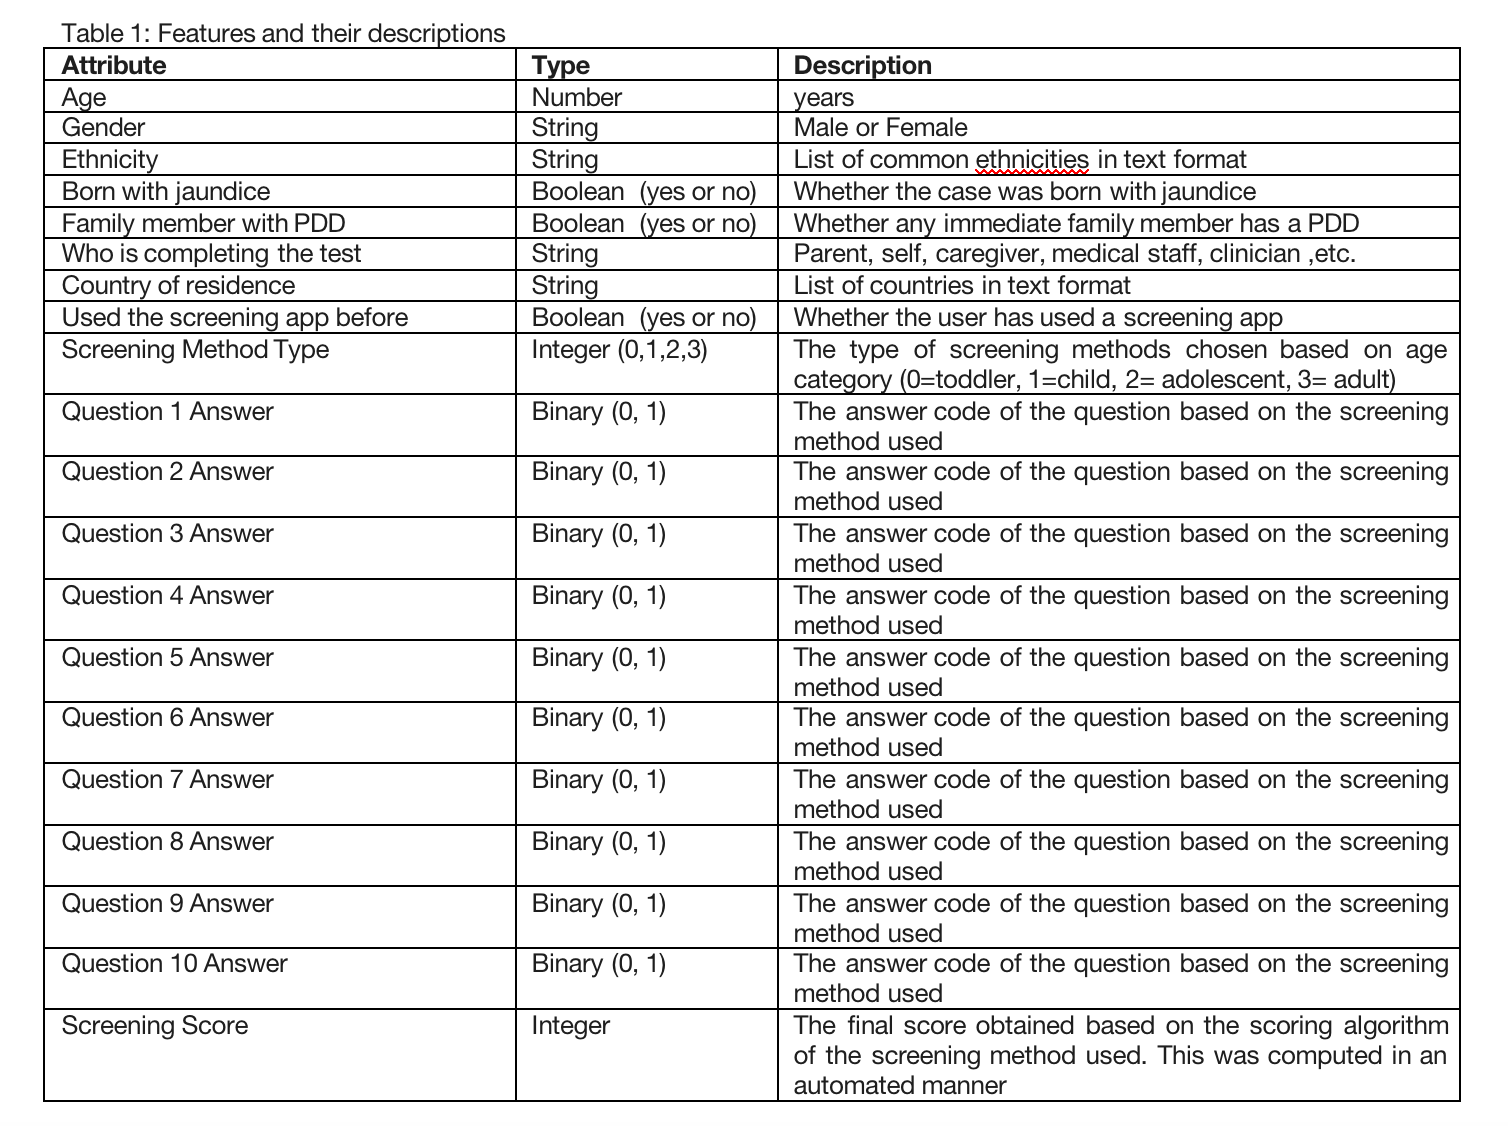

Features like `jundice`, `gender` ,`austim` , `used_app_before`, `Class/ASD` can be considered as binary type variables because from their unique values it can be infered that "yes" and "no" can be replaced by 0 or 1
> **From the above we can conclude the following**
1. **Binary(15) :**   `A1_score` to `A10_score` ,`jundice`, `gender` ,`austim` , `used_app_before`, `Class/ASD` 
2. **Categorical :** `ethnicity`, `country_of_res`, `relation`,`age_desc`
3. **Discrete :**
4. **Continous :** `result`,`age`



### Handling Missing Data

In [ ]:
child_Data.loc[(child_Data['age'].isnull()) |(child_Data['gender'].isnull()) |(child_Data['ethnicity'].isnull()) 
|(child_Data['jundice'].isnull())|(child_Data['austim'].isnull()) |(child_Data['contry_of_res'].isnull())
            |(child_Data['used_app_before'].isnull())|(child_Data['result'].isnull())|(child_Data['age_desc'].isnull())
            |(child_Data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,1,1,0,0,0,1,1,1,0,0,6.0,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
5,0,0,1,0,1,1,0,1,0,1,4.0,m,NaN,no,yes,Egypt,no,5,'4-11 years',NaN,NO
9,0,0,1,1,1,0,1,1,0,0,11.0,f,NaN,no,yes,Austria,no,5,'4-11 years',NaN,NO
11,0,1,0,0,1,0,0,0,0,1,5.0,f,NaN,no,no,Kuwait,no,3,'4-11 years',NaN,NO
19,1,1,1,1,1,1,0,1,0,1,5.0,m,NaN,no,no,Egypt,no,8,'4-11 years',NaN,YES
21,0,0,1,1,0,1,0,1,1,0,9.0,f,NaN,no,no,Egypt,no,5,'4-11 years',NaN,NO
24,1,0,1,1,1,1,0,1,1,1,11.0,m,NaN,no,no,Egypt,no,8,'4-11 years',NaN,YES
28,0,1,1,0,0,0,1,1,0,1,6.0,m,NaN,no,yes,'United Arab Emirates',no,5,'4-11 years',NaN,NO
32,1,0,0,1,0,1,1,1,1,1,NaN,m,NaN,no,no,Egypt,no,7,'4-11 years',NaN,YES


**Since the Missing Data seems randomly distributed so we can go on by removing the missing Data**
> Also, Handling Missing Data can get pretty complex because majority of the columns are categorical or binary

#### By Removing

In [ ]:
# Child Data without missing data 
child_Data.dropna(inplace=True)
child_Data["Set_Label"]= "CHILD"

In [ ]:
child_Data.loc[(child_Data['age'].isnull()) |(child_Data['gender'].isnull()) |(child_Data['ethnicity'].isnull()) 
|(child_Data['jundice'].isnull())|(child_Data['austim'].isnull()) |(child_Data['contry_of_res'].isnull())
            |(child_Data['used_app_before'].isnull())|(child_Data['result'].isnull())|(child_Data['age_desc'].isnull())
            |(child_Data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,Set_Label


## adult_Data

### Pandas info

In [ ]:
adult_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          


From the above we get the following information: 
1.   The number of the independent variables, names of these variables and also about the dependent variable.
2.   We also get the information regarding the number of instances we have for each variable.
3.   At last we get the idea of the Data type of each variables we are dealing with.



### Frequency vs Columns 

In [ ]:
adult_freq = adult_Data.count()
adult_freq

A1_Score           704
A2_Score           704
A3_Score           704
A4_Score           704
A5_Score           704
A6_Score           704
A7_Score           704
A8_Score           704
A9_Score           704
A10_Score          704
age                702
gender             704
ethnicity          609
jundice            704
austim             704
contry_of_res      704
used_app_before    704
result             704
age_desc           704
relation           609
Class/ASD          704
dtype: int64

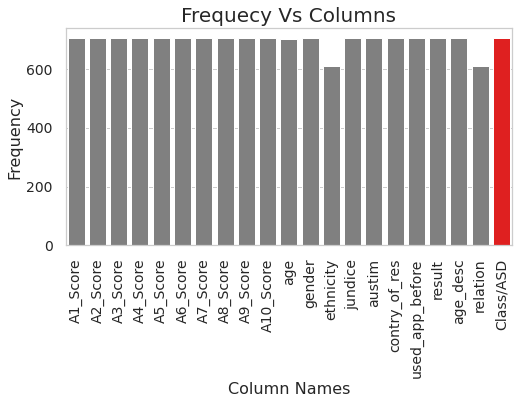

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != "Class/ASD") else 'red' for x in adult_freq.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Frequency")
ax.set_title("Frequecy Vs Columns")
graph=sns.barplot(x=adult_freq.index, y = adult_freq.values,ax=ax,palette=clrs)
# for p in graph.patches:
#     graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
#                 ha='center', va='bottom',
#                 color= 'black')
plt.show()

From the above barplot we get the following information about the dataset: 

1.   It can be observed that there are some missing values in our data.
2.   Perhaps, Our next step must be to find the number of missing values in these columns and do the necessary to make the data consistent.



### Missing Values

In [ ]:
missing_values_adult = adult_Data.isnull().sum()
missing_values_adult

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

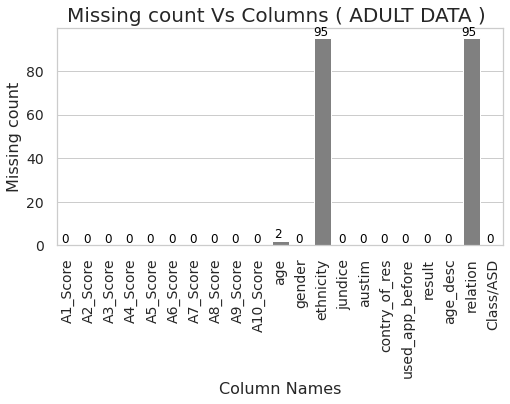

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != "Class/ASD") else 'red' for x in missing_values_adult.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Missing count")
ax.set_title("Missing count Vs Columns ( ADULT DATA ) ")
graph=sns.barplot(x=missing_values_adult.index, y = missing_values_adult.values,ax=ax,palette=clrs)
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                ha='center', va='bottom',
                color= 'black')
plt.show()

From the above plot we got the count of the missing values in the column `age`, `relation`, `ethnicity`. Inorder, to handle these missing values we need to first sort these variable into  **Categorical** , **Discrete** or **Continuous** variables

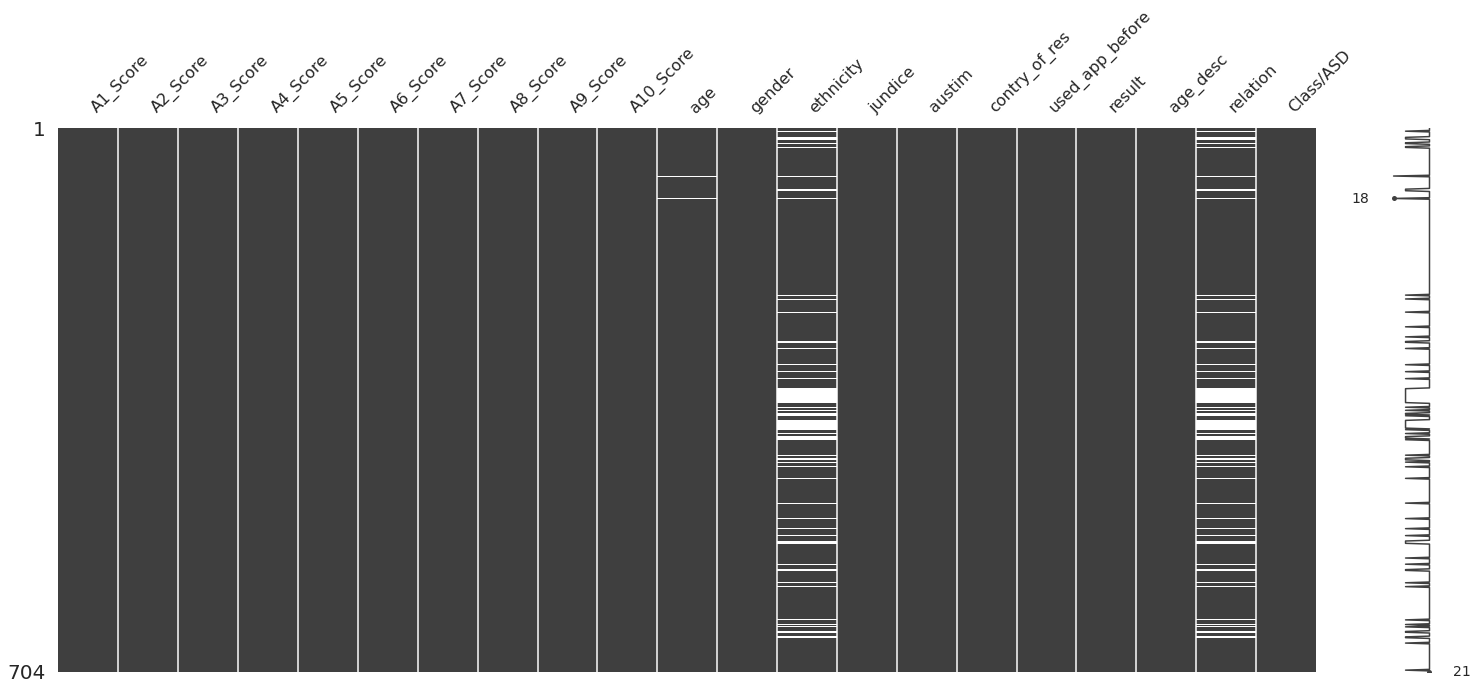

In [ ]:
msno.matrix(adult_Data)

### Attribute Type: `Categorical` , `Discrete`,`Binary`or `Continuous`

In [ ]:
for x in adult_Data.columns:
    print("-"*100)
    print(x," : ",adult_Data[x].unique())

----------------------------------------------------------------------------------------------------
A1_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A2_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A3_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A4_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A5_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A6_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A7_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A8_Score  :  [1 0]
----------------------------------------

"*Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Child) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. "*

**Above subtext and Below Table has been taken from the description file that was floated along with the dataset that was downloaded from the UCI website : [https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#](https://)**

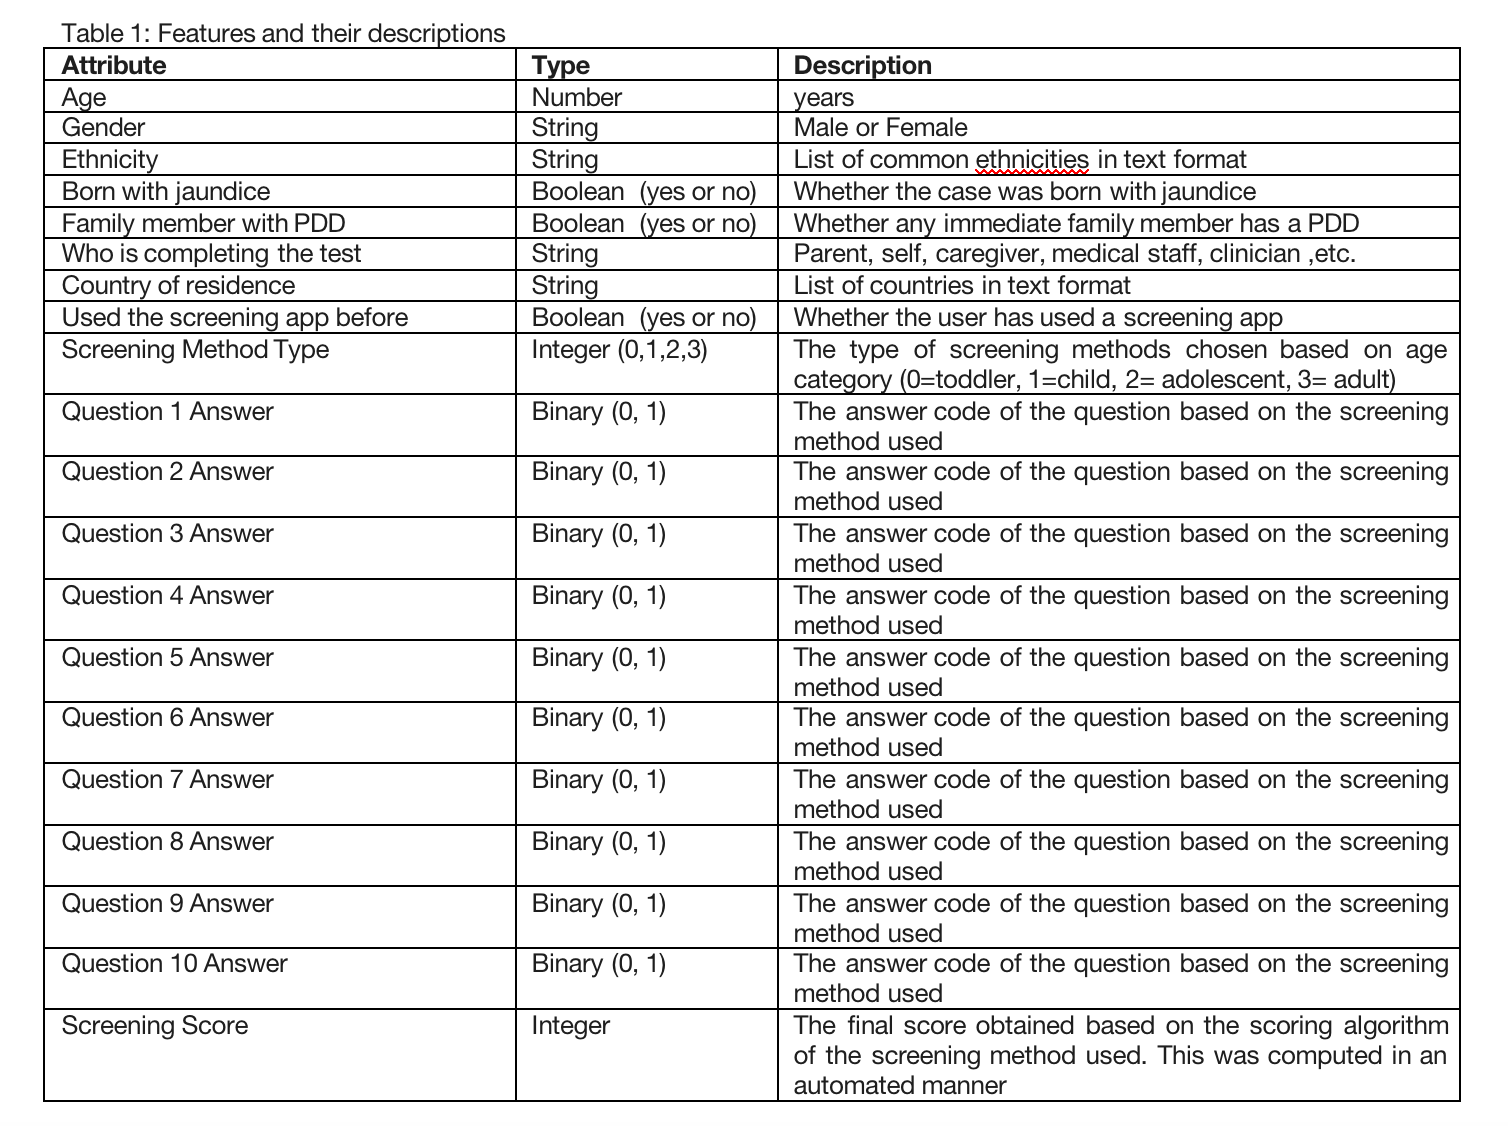

Features like `jundice`, `gender` ,`austim` , `used_app_before`, `Class/ASD` can be considered as binary type variables because from their unique values it can be infered that "yes" and "no" can be replaced by 0 or 1
> **From the above we can conclude the following**
1. **Binary(15) :**   `A1_score` to `A10_score` ,`jundice`, `gender` ,`austim` , `used_app_before`, `Class/ASD` 
2. **Categorical :** `ethnicity`, `country_of_res`, `relation`,`age_desc`
3. **Discrete :**
4. **Continous :** `result`,`age`



### Handling Missing Data

In [ ]:
adult_Data.loc[(adult_Data['age'].isnull()) |(adult_Data['gender'].isnull()) |(adult_Data['ethnicity'].isnull()) 
|(adult_Data['jundice'].isnull())|(adult_Data['austim'].isnull()) |(adult_Data['contry_of_res'].isnull())
            |(adult_Data['used_app_before'].isnull())|(adult_Data['result'].isnull())|(adult_Data['age_desc'].isnull())
            |(adult_Data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
12,0,1,1,1,1,1,0,0,1,0,17.0,f,NaN,no,no,Bahamas,no,6,'18 and more',NaN,NO
13,1,0,0,0,0,0,1,1,0,1,17.0,m,NaN,no,no,Austria,no,4,'18 and more',NaN,NO
14,1,0,0,0,0,0,1,1,0,1,17.0,f,NaN,no,no,Argentina,no,4,'18 and more',NaN,NO
19,0,0,0,0,0,0,1,1,0,1,34.0,m,NaN,yes,no,'United Arab Emirates',no,3,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,33.0,f,NaN,no,no,'United States',no,1,'18 and more',NaN,NO
658,0,0,1,1,0,0,1,0,0,0,43.0,m,NaN,no,no,Azerbaijan,no,3,'18 and more',NaN,NO
659,1,1,1,1,1,1,0,0,1,1,44.0,m,NaN,no,no,Pakistan,no,8,'18 and more',NaN,YES
666,0,0,0,0,0,0,0,1,0,0,56.0,m,NaN,no,no,Iraq,no,1,'18 and more',NaN,NO


**Since the Missing Data seems randomly distributed so we can go on by removing the missing Data**
> Also, Handling Missing Data can get pretty complex because majority of the columns are categorical or binary

#### By Removing

In [ ]:
adult_Data.dropna(inplace=True)
adult_Data["Set_Label"]= "ADULT"

In [ ]:
adult_Data.loc[(adult_Data['age'].isnull()) |(adult_Data['gender'].isnull()) |(adult_Data['ethnicity'].isnull()) 
|(adult_Data['jundice'].isnull())|(adult_Data['austim'].isnull()) |(adult_Data['contry_of_res'].isnull())
            |(adult_Data['used_app_before'].isnull())|(adult_Data['result'].isnull())|(adult_Data['age_desc'].isnull())
            |(adult_Data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,Set_Label


## adol_Data

### Pandas info

In [ ]:
adol_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         104 non-null    int64 
 1   A2_Score         104 non-null    int64 
 2   A3_Score         104 non-null    int64 
 3   A4_Score         104 non-null    int64 
 4   A5_Score         104 non-null    int64 
 5   A6_Score         104 non-null    int64 
 6   A7_Score         104 non-null    int64 
 7   A8_Score         104 non-null    int64 
 8   A9_Score         104 non-null    int64 
 9   A10_Score        104 non-null    int64 
 10  age              104 non-null    int64 
 11  gender           104 non-null    object
 12  ethnicity        98 non-null     object
 13  jundice          104 non-null    object
 14  austim           104 non-null    object
 15  contry_of_res    104 non-null    object
 16  used_app_before  104 non-null    object
 17  result           104 non-null    in


From the above we get the following information: 
1.   The number of the independent variables, names of these variables and also about the dependent variable.
2.   We also get the information regarding the number of instances we have for each variable.
3.   At last we get the idea of the Data type of each variables we are dealing with.



### Frequency vs Columns 

In [ ]:
adol_freq = adol_Data.count()
adol_freq

A1_Score           104
A2_Score           104
A3_Score           104
A4_Score           104
A5_Score           104
A6_Score           104
A7_Score           104
A8_Score           104
A9_Score           104
A10_Score          104
age                104
gender             104
ethnicity           98
jundice            104
austim             104
contry_of_res      104
used_app_before    104
result             104
age_desc           104
relation            98
Class/ASD          104
dtype: int64

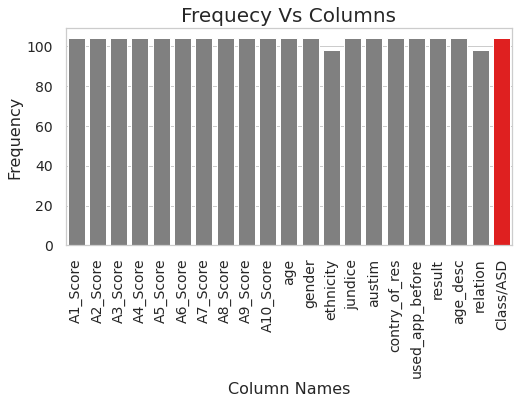

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != "Class/ASD") else 'red' for x in adol_freq.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Frequency")
ax.set_title("Frequecy Vs Columns")
graph=sns.barplot(x=adol_freq.index, y = adol_freq.values,ax=ax,palette=clrs)
# for p in graph.patches:
#     graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
#                 ha='center', va='bottom',
#                 color= 'black')
plt.show()

From the above barplot we get the following information about the dataset: 

1.   It can be observed that there are some missing values in our data.
2.   Perhaps, Our next step must be to find the number of missing values in these columns and do the necessary to make the data consistent.



### Missing Values

In [ ]:
missing_values_adol = adol_Data.isnull().sum()
missing_values_adol

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          6
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           6
Class/ASD          0
dtype: int64

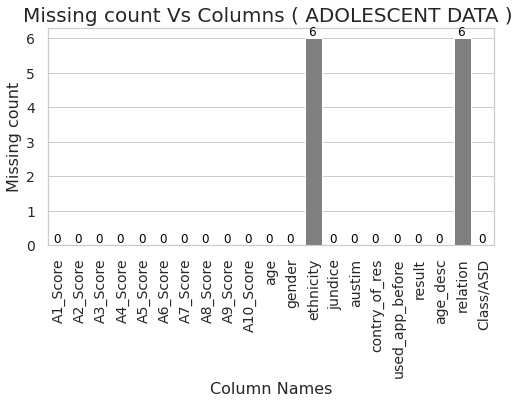

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != "Class/ASD") else 'red' for x in missing_values_adol.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Missing count")
ax.set_title("Missing count Vs Columns ( ADOLESCENT DATA ) ")
graph=sns.barplot(x=missing_values_adol.index, y = missing_values_adol.values,ax=ax,palette=clrs)
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                ha='center', va='bottom',
                color= 'black')
plt.show()

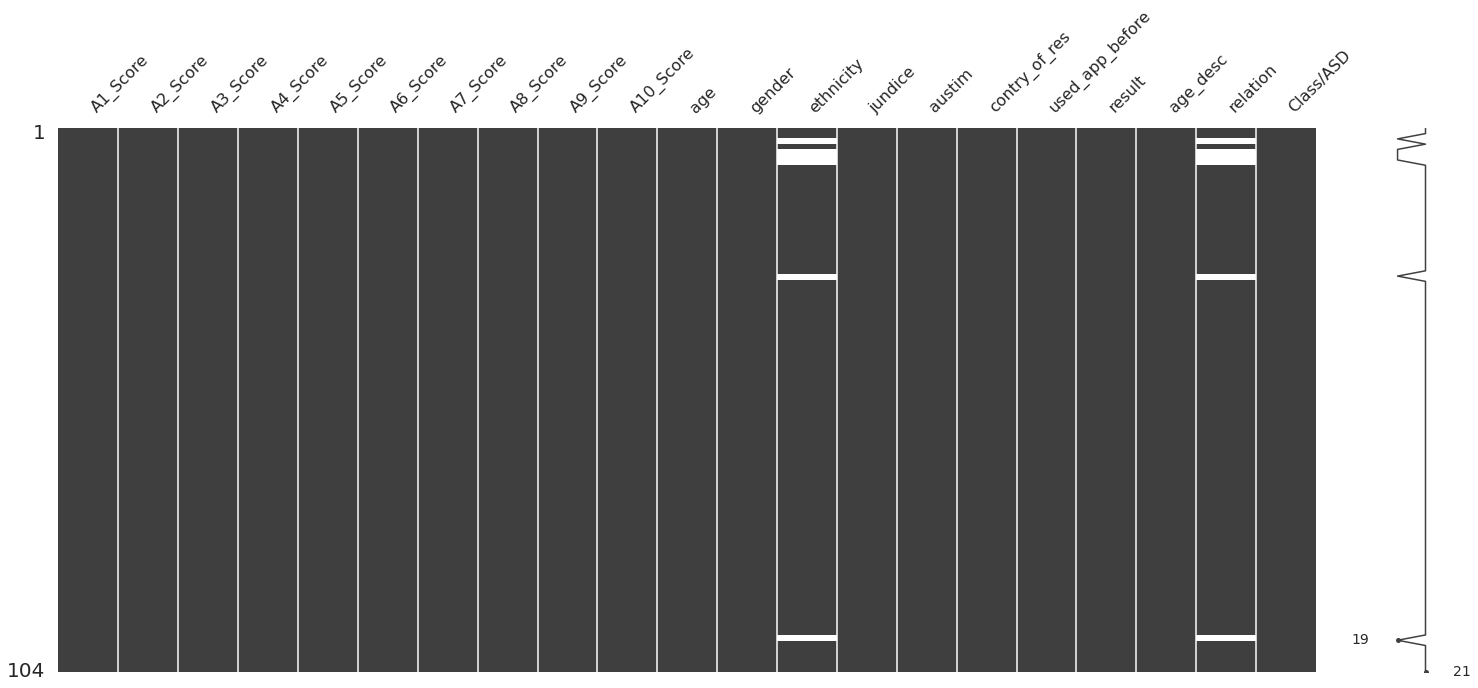

In [ ]:
msno.matrix(adol_Data)

From the above plot we got the count of the missing values in the column `age`, `relation`, `ethnicity`. Inorder, to handle these missing values we need to first sort these variable into  **Categorical** , **Discrete** or **Continuous** variables

### Attribute Type: `Categorical` , `Discrete`,`Binary`or `Continuous`

In [ ]:
for x in adol_Data.columns:
    print("-"*100)
    print(x," : ",adol_Data[x].unique())

----------------------------------------------------------------------------------------------------
A1_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A2_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A3_Score  :  [0 1]
----------------------------------------------------------------------------------------------------
A4_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A5_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A6_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A7_Score  :  [1 0]
----------------------------------------------------------------------------------------------------
A8_Score  :  [1 0]
----------------------------------------

"*Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Child) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. "*

**Above subtext and Below Table has been taken from the description file that was floated along with the dataset that was downloaded from the UCI website : [https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++](https://)**

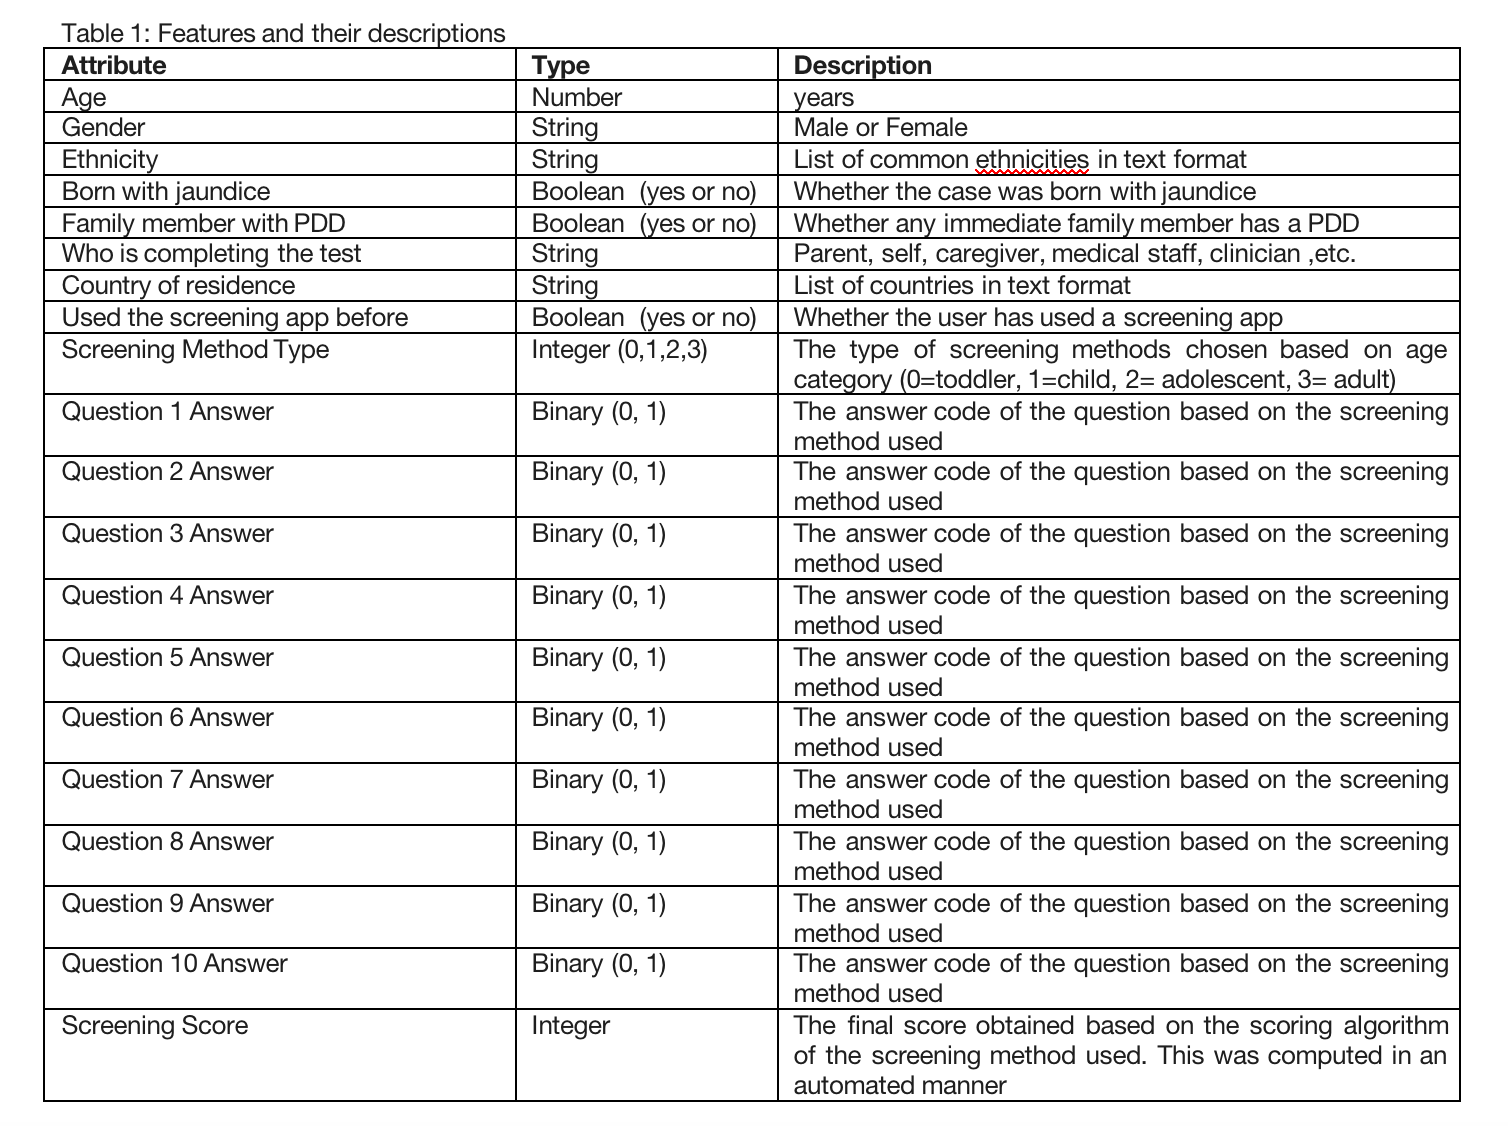

Features like `jundice`, `gender` ,`austim` , `used_app_before`, `Class/ASD` can be considered as binary type variables because from their unique values it can be infered that "yes" and "no" can be replaced by 0 or 1
> **From the above we can conclude the following**
1. **Binary(15) :**   `A1_score` to `A10_score` ,`jundice`, `gender` ,`austim` , `used_app_before`, `Class/ASD` 
2. **Categorical :** `ethnicity`, `country_of_res`, `relation`,`age_desc`
3. **Discrete :**
4. **Continous :** `result`,`age`



### Handling Missing Data ( USED )

In [ ]:
adol_Data.loc[(adol_Data['age'].isnull()) |(adol_Data['gender'].isnull()) |(adol_Data['ethnicity'].isnull()) 
|(adol_Data['jundice'].isnull())|(adol_Data['austim'].isnull()) |(adol_Data['contry_of_res'].isnull())
            |(adol_Data['used_app_before'].isnull())|(adol_Data['result'].isnull())|(adol_Data['age_desc'].isnull())
            |(adol_Data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,0,0,0,0,0,0,0,0,1,1,12,f,NaN,no,no,AmericanSamoa,no,2,'12-16 years',NaN,NO
4,1,1,1,1,1,1,1,0,0,0,16,f,NaN,no,no,Albania,no,7,'12-16 years',NaN,YES
5,1,0,0,0,0,1,0,0,1,0,13,f,NaN,no,no,Belgium,no,3,'12-16 years',NaN,NO
6,0,0,0,1,1,1,1,1,1,0,16,f,NaN,no,no,Afghanistan,no,6,'12-16 years',NaN,NO
28,1,1,0,0,0,0,1,0,1,0,13,m,NaN,no,no,Afghanistan,no,4,'12-16 years',NaN,NO
97,1,0,0,0,1,0,0,1,0,1,15,f,NaN,no,no,Argentina,no,4,'12-15 years',NaN,NO


**Since the Missing Data seems randomly distributed so we can go on by removing the missing Data**
> Also, Handling Missing Data can get pretty complex because majority of the columns are categorical or binary

#### By Removing

In [ ]:
# Child Data without missing data 
adol_Data.dropna(inplace=True)
adol_Data["Set_Label"]= "ADOL"

In [ ]:
adol_Data.loc[(adol_Data['age'].isnull()) |(adol_Data['gender'].isnull()) |(adol_Data['ethnicity'].isnull()) 
|(adol_Data['jundice'].isnull())|(adol_Data['austim'].isnull()) |(adol_Data['contry_of_res'].isnull())
            |(adol_Data['used_app_before'].isnull())|(adol_Data['result'].isnull())|(adol_Data['age_desc'].isnull())
            |(adol_Data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,Set_Label


---
# Merging the Data sets

In [ ]:
combData=pd.concat([child_Data,adol_Data,adult_Data],axis=0)
combData.reset_index(inplace = True)

---
# Merged Data Description

##*Pandas* info

In [ ]:
combData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            955 non-null    int64  
 1   A1_Score         955 non-null    int64  
 2   A2_Score         955 non-null    int64  
 3   A3_Score         955 non-null    int64  
 4   A4_Score         955 non-null    int64  
 5   A5_Score         955 non-null    int64  
 6   A6_Score         955 non-null    int64  
 7   A7_Score         955 non-null    int64  
 8   A8_Score         955 non-null    int64  
 9   A9_Score         955 non-null    int64  
 10  A10_Score        955 non-null    int64  
 11  age              955 non-null    float64
 12  gender           955 non-null    object 
 13  ethnicity        955 non-null    object 
 14  jundice          955 non-null    object 
 15  austim           955 non-null    object 
 16  contry_of_res    955 non-null    object 
 17  used_app_before 

## Frequency vs Columns

In [ ]:
comb_freq = combData.count()
comb_freq

index              955
A1_Score           955
A2_Score           955
A3_Score           955
A4_Score           955
A5_Score           955
A6_Score           955
A7_Score           955
A8_Score           955
A9_Score           955
A10_Score          955
age                955
gender             955
ethnicity          955
jundice            955
austim             955
contry_of_res      955
used_app_before    955
result             955
age_desc           955
relation           955
Class/ASD          955
Set_Label          955
dtype: int64

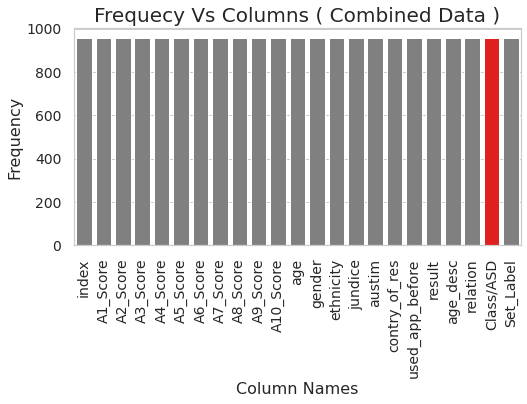

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != 'Class/ASD') else 'red' for x in comb_freq.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Frequency")
ax.set_title("Frequecy Vs Columns ( Combined Data )")
graph=sns.barplot(x=comb_freq.index, y = comb_freq.values,ax=ax,palette=clrs)
plt.show()

## Missing values

In [ ]:
missing_values = combData.isnull().sum()
missing_values

index              0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
Set_Label          0
dtype: int64

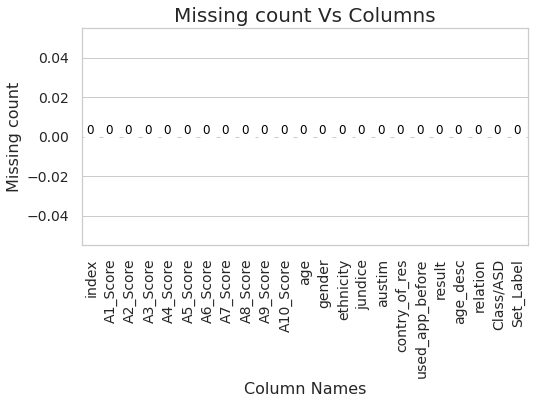

In [ ]:
plt_dims = (8, 4)
fig, ax = plt.subplots(figsize=plt_dims)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
clrs = ['grey' if (x != "Class/ASD") else 'red' for x in missing_values.index ]
ax.set_xlabel("Column Names")
ax.set_ylabel("Missing count")
ax.set_title("Missing count Vs Columns")
graph=sns.barplot(x=missing_values.index, y = missing_values.values,ax=ax,palette=clrs)
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                ha='center', va='bottom',
                color= 'black')
plt.show()

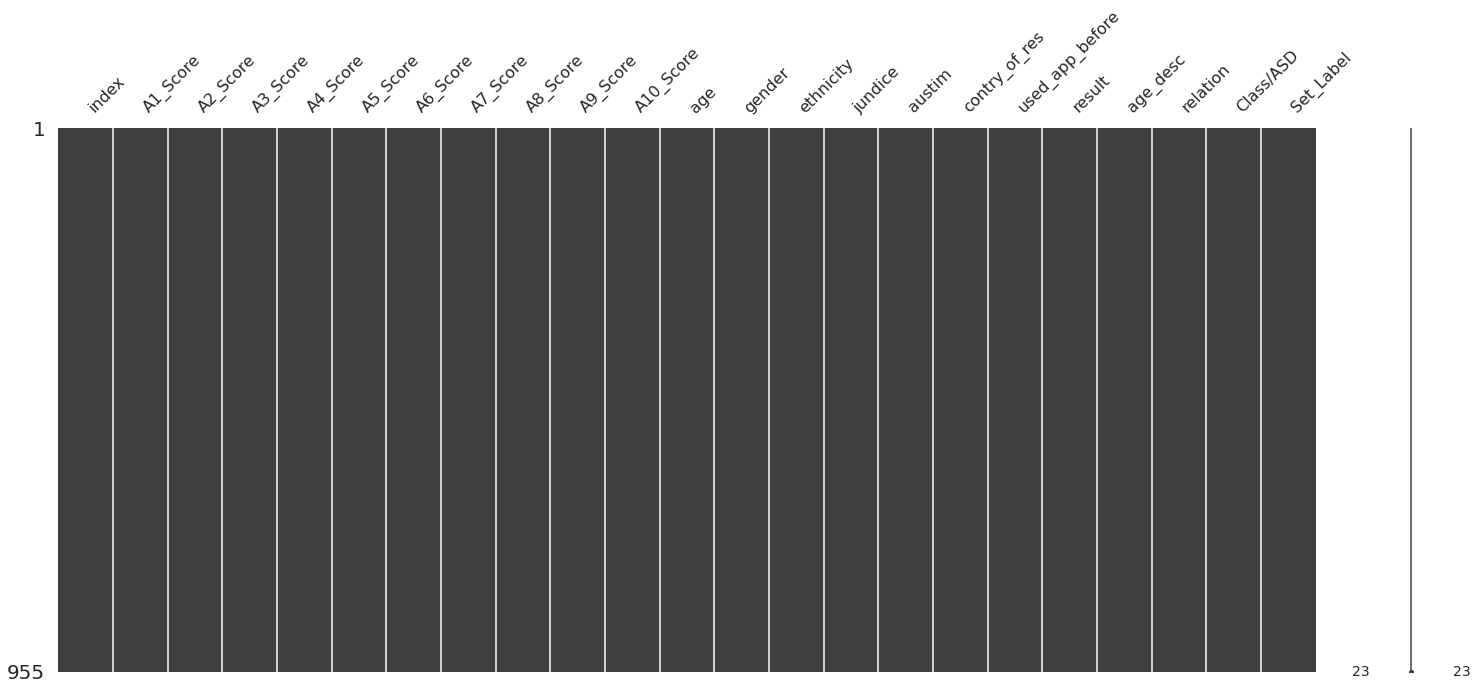

In [ ]:
msno.matrix(combData)

From the above plot we got the count of the missing values in the column `age`, `relation`, `ethnicity`. Inorder, to handle these missing values we need to first sort these variable into  **Categorical** , **Discrete** or **Continuous** variables

## Peeking into unique values for correction

In [ ]:
combData['relation']=combData.relation.map({'Self':'self','Parent': 'Parent','Relative':'Relative',"'Health care professional'": "'Health care professional'",'self':'self', 'Others':'Others'})

In [ ]:
for x in combData.columns:
    print("-"*100)
    print(x," : ",combData[x].unique())

----------------------------------------------------------------------------------------------------
index  :  [  0   1   4   6   7   8  10  12  13  14  15  16  17  18  20  22  23  25
  26  27  29  30  31  33  34  35  37  38  39  41  42  44  45  46  48  49
  51  53  55  57  58  59  60  61  62  63  64  66  67  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 111 112 113 114 115 116 117 118 119 120 121 122 124 125 127 128 129 130
 131 132 133 134 135 136 137 139 140 141 142 143 144 145 147 148 150 151
 152 153 154 155 156 157 158 159 161 162 163 164 165 166 167 169 170 171
 172 173 175 176 177 178 179 182 183 184 185 186 187 188 189 191 192 193
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 234
 236 237 238 239 240 241 245 246 247 248 250 252 253 254 255 256 257 258
 259 260 261 

We finally have our merged data as `combData` we will perform some EDA on the data to understand the relation between the features with the target variable.



---


# EDA


## Number of Datapoints with ADS and Not ADS

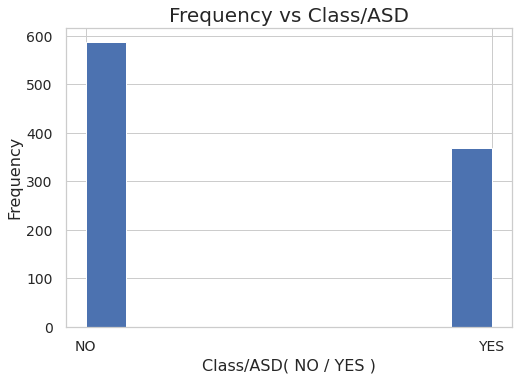

In [ ]:
ax = combData["Class/ASD"].hist( grid = True,bins = 10)
ax.set_xlabel("Class/ASD( NO / YES )")
ax.set_ylabel("Frequency")
ax.set_title("Frequency vs Class/ASD")
plt.savefig("./1_skew.png")

From above we can conclude that the dataset is not very imbalanced
>  

*   We can make the dataset balanced but we don't have a need to do that for now.
*   We make the dataset balanced to not let model to overshoot the bias during the training.



## result vs jundice for `austim`

### CombData

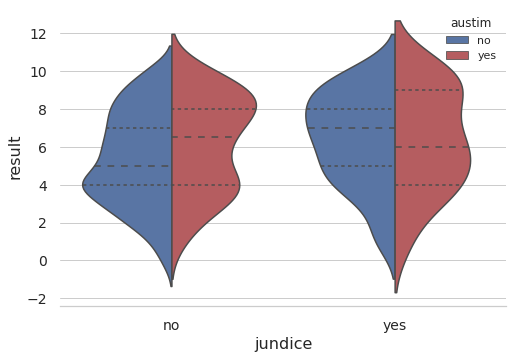

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=combData, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)
# plt.savefig(pathToSave)

### Individual Dataset `Child` , `Adol` and `Adult`

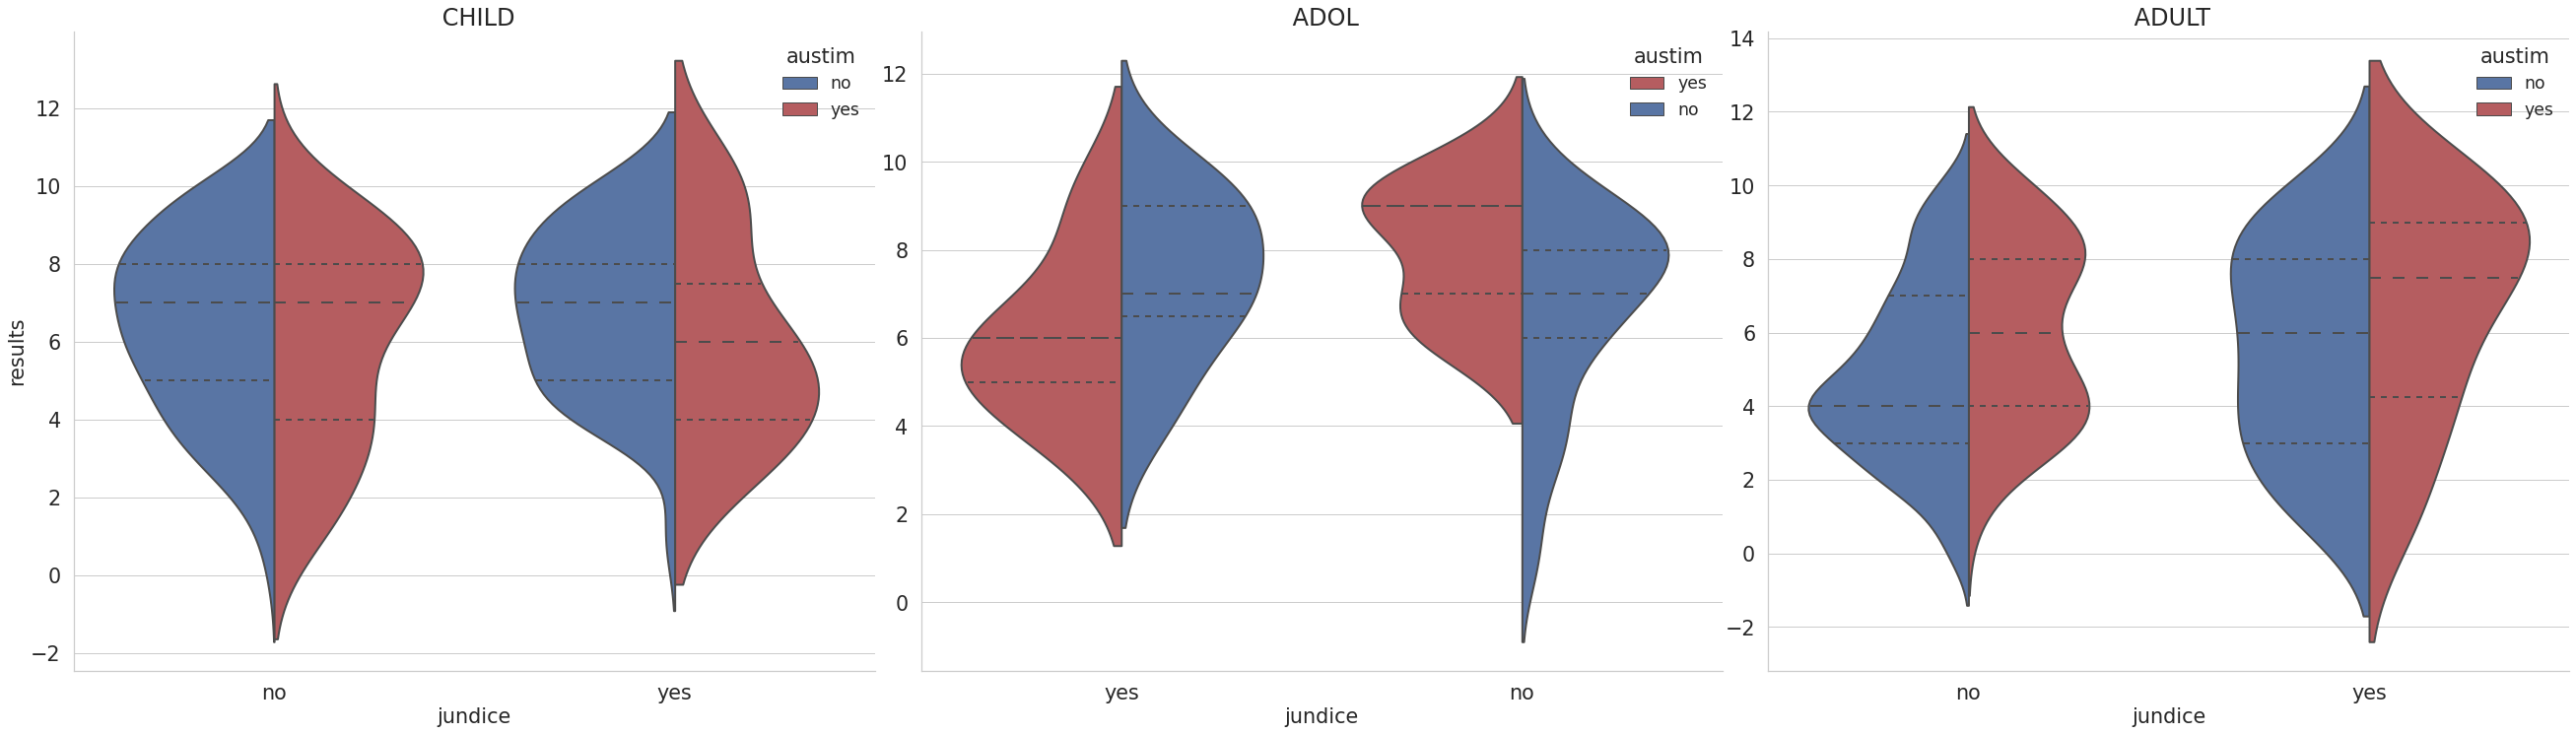

In [ ]:
g = sns.FacetGrid(combData, col="Set_Label",height = 10 , aspect= 1.2,sharex = False,sharey = False)

g.map_dataframe(sns.violinplot,x="jundice", y="result", hue="austim", data=combData, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"},linewidth = 2)
g.set_ylabels("results")
g.set_xlabels("jundice")
for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='xx-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = 'xx-large')
    ax.set_yticklabels(ax.get_yticklabels(),fontsize = 'xx-large')
    
    # Make title more human-readable and larger
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='24')
for ax in g.axes.ravel():
    ax.legend(fontsize = 'x-large',title = "austim",title_fontsize = "xx-large")

## result vs jundice for `Class/ASD`

### CombData

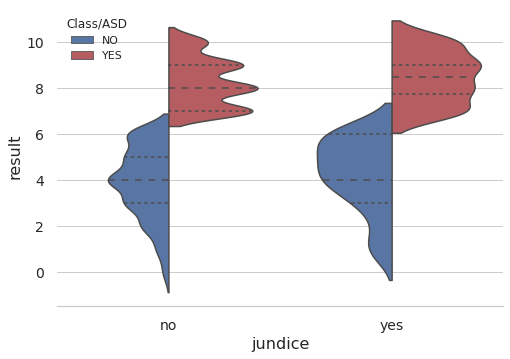

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=combData, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)
plt.savefig("./3a_rja.png")

### Individual Dataset `Child` , `Adol` and `Adult`

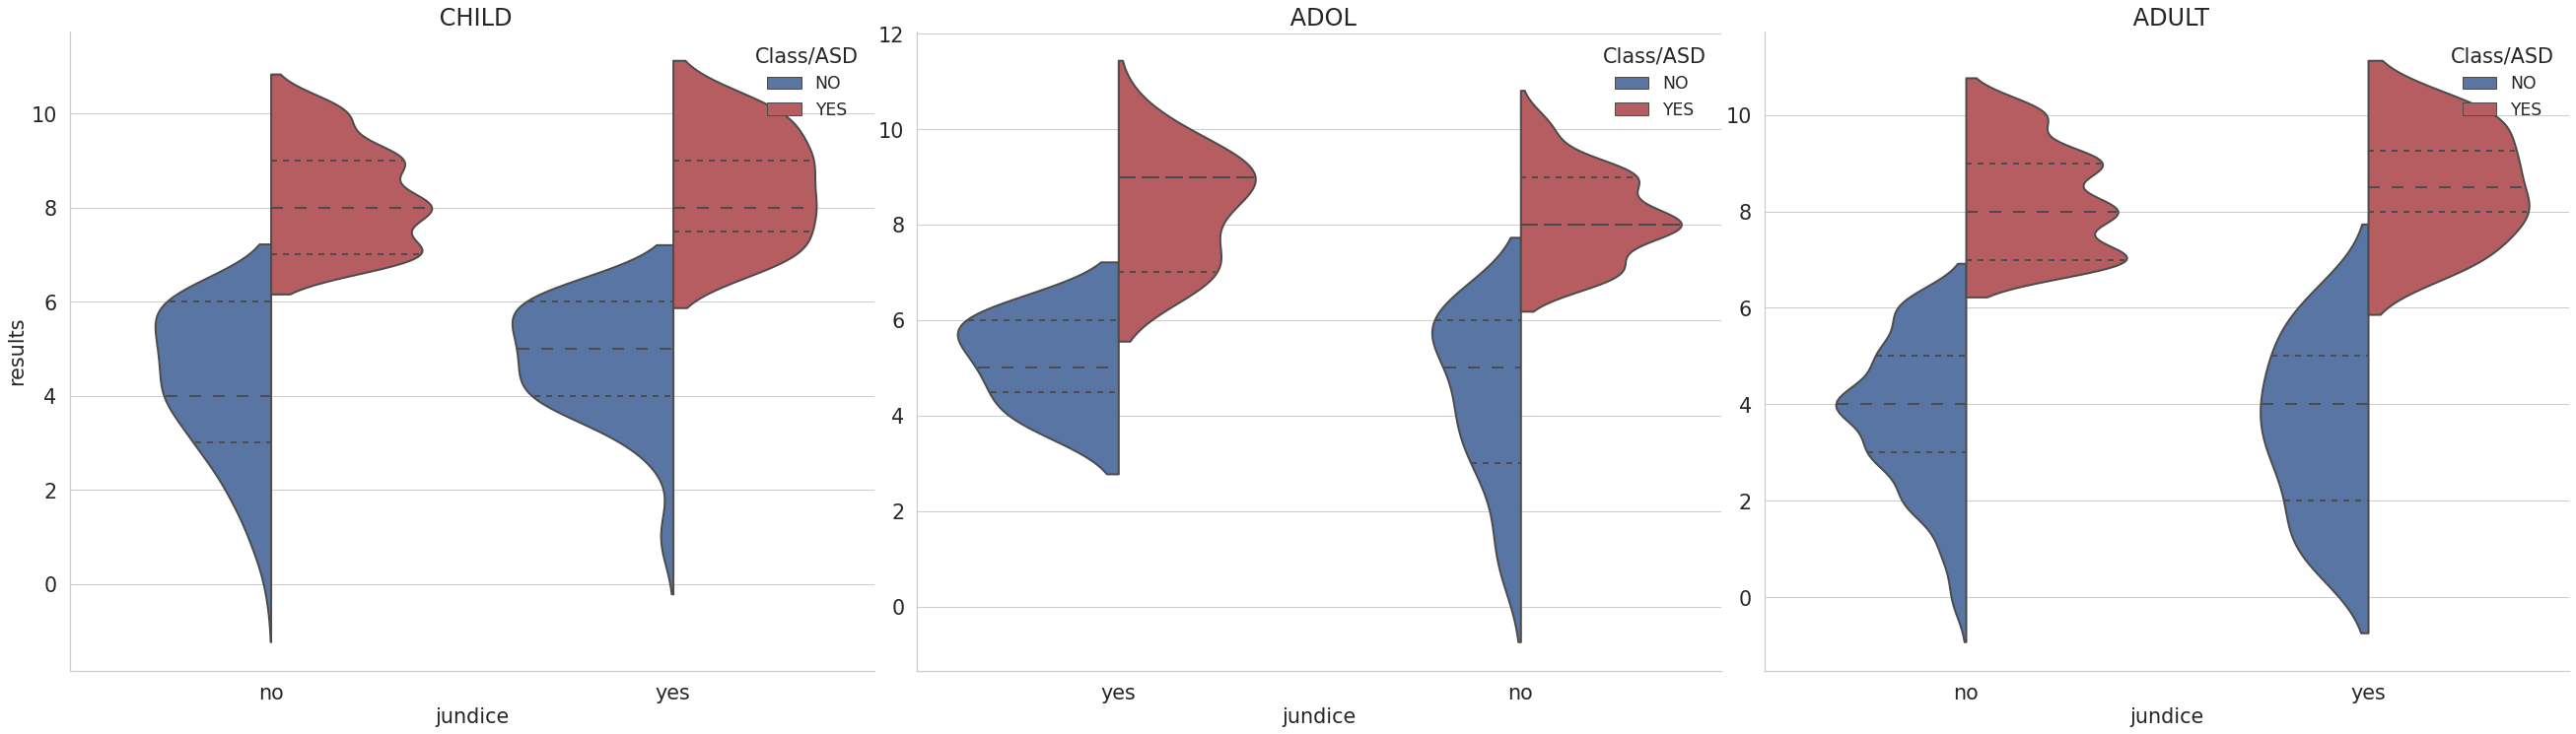

In [ ]:
g = sns.FacetGrid(combData, col="Set_Label",height = 10 , aspect= 1.2,sharex = False,sharey = False)

g.map_dataframe(sns.violinplot,x="jundice", y="result", hue="Class/ASD", data=combData, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"},linewidth = 2)
g.set_ylabels("results")
g.set_xlabels("jundice")
for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='xx-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = 'xx-large')
    ax.set_yticklabels(ax.get_yticklabels(),fontsize = 'xx-large')
    
    # Make title more human-readable and larger
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='24')
for ax in g.axes.ravel():
    ax.legend(fontsize = 'x-large',title = "Class/ASD",title_fontsize = "xx-large")

## result vs gender for `Class/ASD`

### CombData

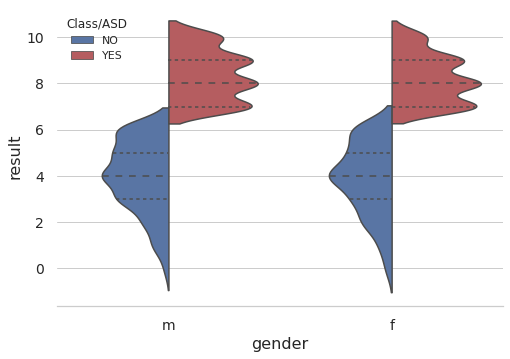

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=combData, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)
plt.savefig("./3a_rga.png")

### Individual Dataset `Child` , `Adol` and `Adult`

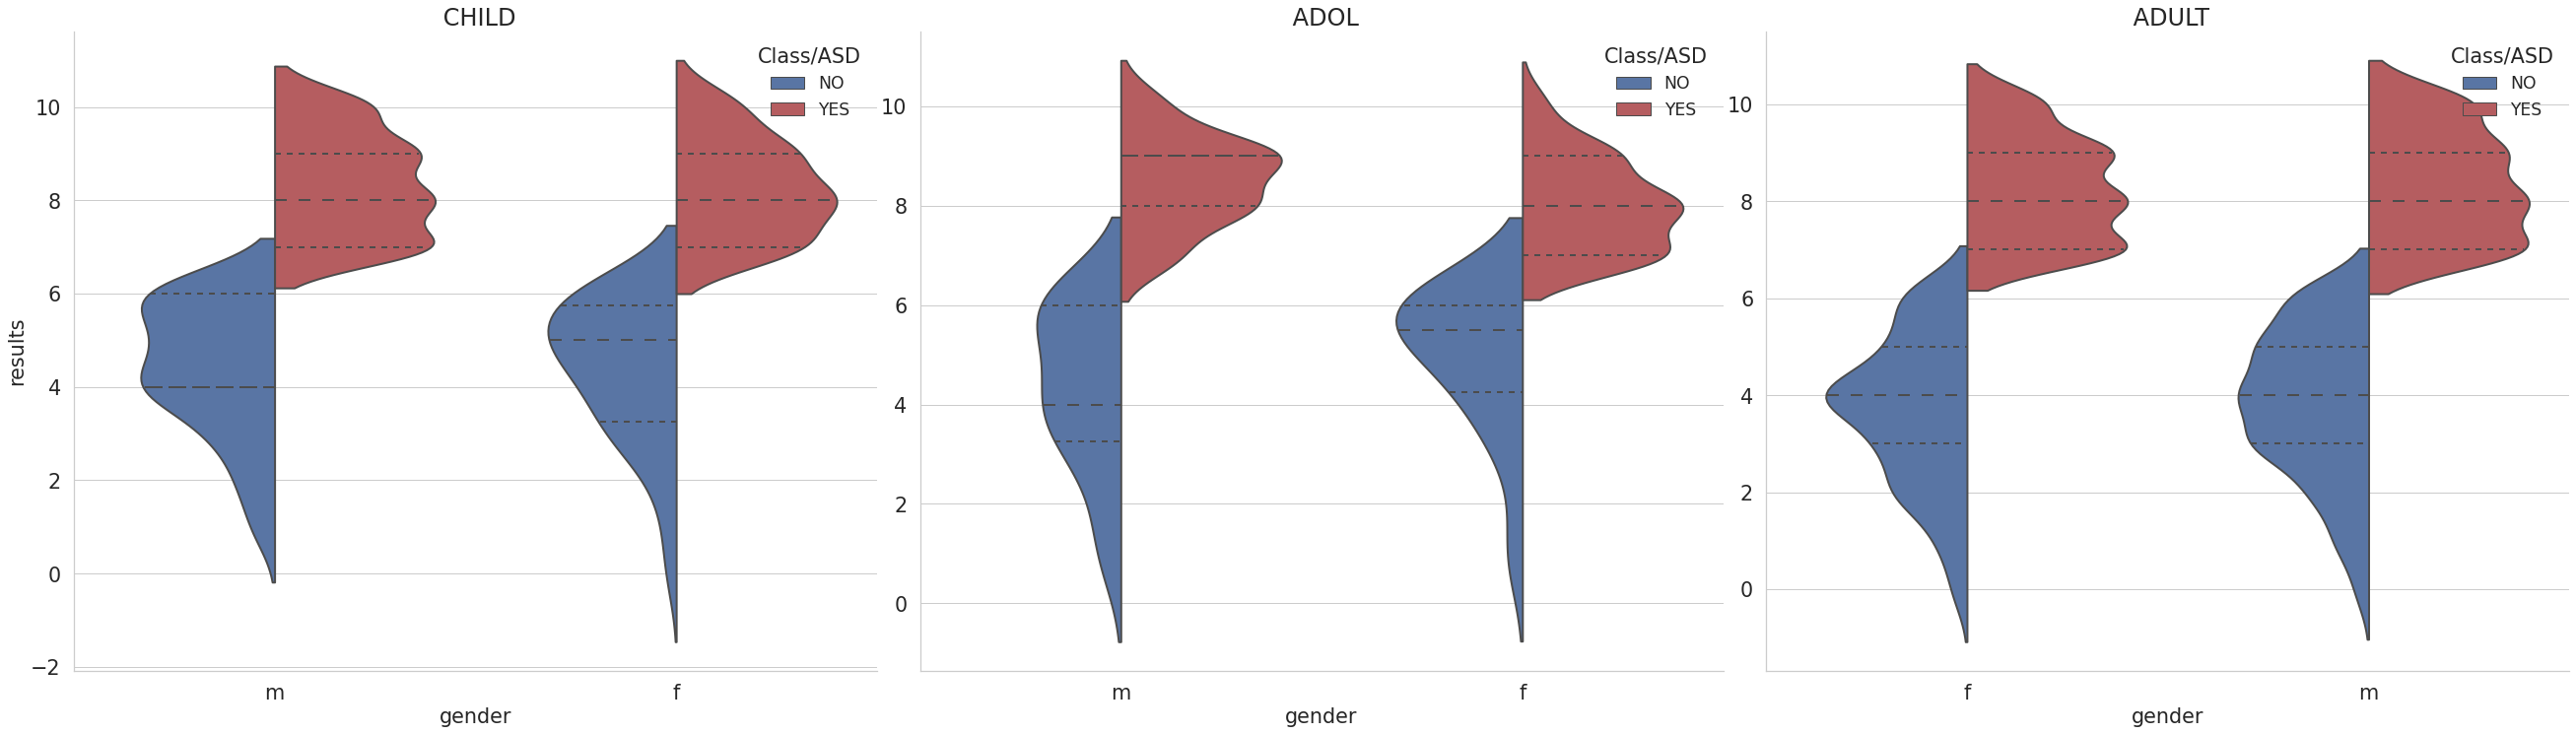

In [ ]:
g = sns.FacetGrid(combData, col="Set_Label",height = 10 , aspect= 1.2,sharex = False,sharey = False)

g.map_dataframe(sns.violinplot,x="gender", y="result", hue="Class/ASD", data=combData, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"},linewidth = 2)
g.set_ylabels("results")
g.set_xlabels("gender")
for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='xx-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = 'xx-large')
    ax.set_yticklabels(ax.get_yticklabels(),fontsize = 'xx-large')
    
    # Make title more human-readable and larger
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='24')
for ax in g.axes.ravel():
    ax.legend(fontsize = 'x-large',title = "Class/ASD",title_fontsize = "xx-large")

## gender vs results for Class/ASD on relation

### violin Plot

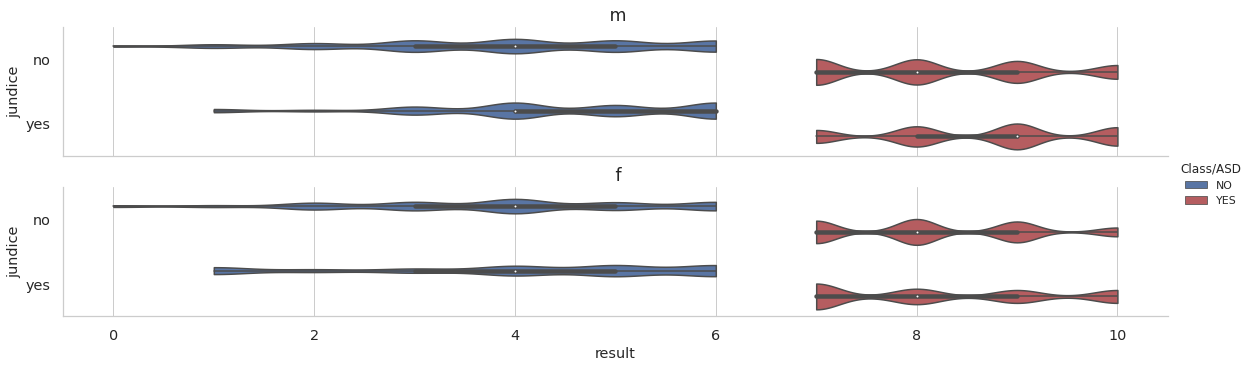

In [ ]:
g = sns.catplot(x="result", y="jundice",
                   hue="Class/ASD", row="gender",
                   data=combData,
                    orient="h", height=2.5, aspect=6.5, palette={'YES': "r", 'NO': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)
for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='large')
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = 'large')
    ax.set_yticklabels(ax.get_yticklabels(),fontsize = 'large')
    if ax.get_title():
            ax.set_title(ax.get_title().split('=')[1],
                        fontsize='x-large')

### boxplot

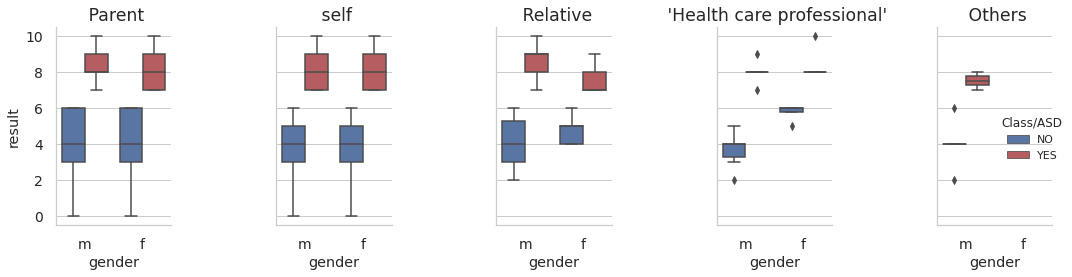

In [ ]:
g=sns.catplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=combData, kind="box", height=4, aspect= 0.7, palette={'YES': "r", 'NO': "b"});
g.fig.tight_layout()
for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='large')
    if ax.get_title():
            ax.set_title(ax.get_title().split('=')[1],
                        fontsize='x-large')
plt.savefig("./2_rpa.png")

---
# Data Normalization

## Removal of some constant columns and splitting the **combData** into `labelData` and `featureData`


From the above two stages in our project pipeline it is prudent to do discard two columns **`used_app_before`** and **`age_desc `**in our *independent variables set* in the early stage before the feature selection process because they are constant columns of datatype object(String).

In [ ]:
# Split the data into features and target label
labelData = combData['Class/ASD']
featureData = combData[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

## Normalization

In later stage of our pipeline where we will build the models for classification. Some of the models require data to be normalized. Majority of the attributes/variables in our combData are categorical or binary except `age` and `result`. Hence, we must normalize these attributes using min-max scaler for simplicity.

In [ ]:
scaler = MinMaxScaler()
numerical = ['age', 'result']
mm_featureData = pd.DataFrame(data = featureData)
mm_featureData[numerical] = scaler.fit_transform(featureData[numerical])
# Show an example of a record with scaling applied
display(mm_featureData.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.005277,m,Others,no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
1,0.005277,m,'Middle Eastern ',no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
2,0.002639,m,Others,yes,no,'United States',1.0,Parent,1,1,1,1,1,1,1,1,1,1
3,0.002639,m,White-European,no,no,'United Kingdom',0.7,Parent,1,0,1,1,1,1,0,1,0,1
4,0.002639,f,'Middle Eastern ',no,no,Bahrain,0.8,Parent,1,1,1,1,1,1,1,1,0,0


# Data Transformation

## One-Hot-Coding
From the above stages in the pipeline we can clearly see that majority of the varaibles are categorical type but typically, ML algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. 
Additionally, we need to convert the `Class/ASD` into numerical too because it consist of string. Perhaps, can be mapped as {'YES': 1 'NO':0}
   - Set records with "NO" to `0` and records with "YES" to `1`.

In [ ]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
featuresDf = pd.get_dummies(mm_featureData)
display(featuresDf.head(5))
# Encode the 'labelData' data to numerical values
labelDf = labelData.apply(lambda x: 1 if x == 'YES' else 0)
# Print the number of features after one-hot encoding
encoded = list(featuresDf.columns)
print(encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender_f,gender_m,ethnicity_'Middle Eastern ',ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,jundice_no,jundice_yes,austim_no,austim_yes,contry_of_res_'Costa Rica',contry_of_res_'Czech Republic',contry_of_res_'Isle of Man',contry_of_res_'New Zealand',contry_of_res_'Saudi Arabia',contry_of_res_'Sierra Leone',contry_of_res_'South Africa',contry_of_res_'South Korea',contry_of_res_'Sri Lanka',contry_of_res_'U.S. Outlying Islands',contry_of_res_'United Arab Emirates',...,contry_of_res_Ghana,contry_of_res_Greenland,contry_of_res_Iceland,contry_of_res_India,contry_of_res_Indonesia,contry_of_res_Iran,contry_of_res_Iraq,contry_of_res_Ireland,contry_of_res_Italy,contry_of_res_Japan,contry_of_res_Jordan,contry_of_res_Libya,contry_of_res_Malaysia,contry_of_res_Malta,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_Nicaragua,contry_of_res_Niger,contry_of_res_Nigeria,contry_of_res_Norway,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Serbia,contry_of_res_Spain,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_Uruguay,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_self
0,0.005277,0.5,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.005277,0.5,1,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.002639,1.0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.002639,0.7,1,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.002639,0.8,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'", "contry_of_res_'Czech Republic'", "contry_of_res_'Isle of Man'", "contry_of_res_'New Zealand'", "contry_of_res_'Saudi Arabia'", "contry_of_res_'Sierra Leone'", "contry_of_res_'South Africa'", "contry_of_res_'South Korea'", "contry_of_res_'Sri Lanka'", "contry_of_res_'U.S. Outlying Islands'", "contry_of_res_'United Arab Emirates'", "contry_of_res_'United Kingdom'", "contry_of_res_'United States'", "contry_of_res_'Viet Nam'", 'contry_of_res_Afghanistan', 'contry_of_res_Albania', 'contry_of_res_Ameri

In [ ]:
featuresDf

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender_f,gender_m,ethnicity_'Middle Eastern ',ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,jundice_no,jundice_yes,austim_no,austim_yes,contry_of_res_'Costa Rica',contry_of_res_'Czech Republic',contry_of_res_'Isle of Man',contry_of_res_'New Zealand',contry_of_res_'Saudi Arabia',contry_of_res_'Sierra Leone',contry_of_res_'South Africa',contry_of_res_'South Korea',contry_of_res_'Sri Lanka',contry_of_res_'U.S. Outlying Islands',contry_of_res_'United Arab Emirates',...,contry_of_res_Ghana,contry_of_res_Greenland,contry_of_res_Iceland,contry_of_res_India,contry_of_res_Indonesia,contry_of_res_Iran,contry_of_res_Iraq,contry_of_res_Ireland,contry_of_res_Italy,contry_of_res_Japan,contry_of_res_Jordan,contry_of_res_Libya,contry_of_res_Malaysia,contry_of_res_Malta,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_Nicaragua,contry_of_res_Niger,contry_of_res_Nigeria,contry_of_res_Norway,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Serbia,contry_of_res_Spain,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_Uruguay,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_self
0,0.005277,0.5,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.005277,0.5,1,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.002639,1.0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.002639,0.7,1,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.002639,0.8,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.060686,1.0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
951,0.055409,0.7,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
952,0.079156,0.3,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
953,0.081794,0.6,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Saving the DataFrames till this point ( Checkpoint 1)

In [ ]:
featuresDf.to_csv("./Data/featuresDf.csv")
labelDf.to_csv("./Data/labelDf.csv")

## Classwise Visualization

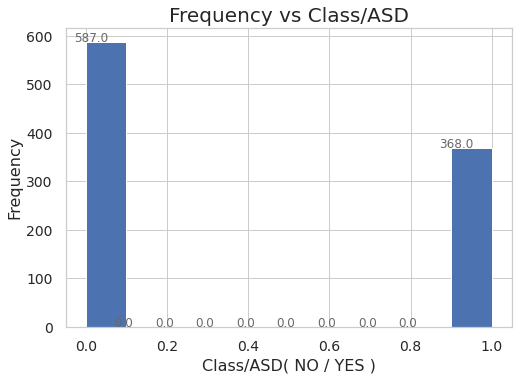

In [ ]:
ax = labelDf.hist( grid = True,bins = 10)
ax.set_xlabel("Class/ASD( NO / YES )")
ax.set_ylabel("Frequency")
ax.set_title("Frequency vs Class/ASD")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(i.get_height()),
                color='dimgrey')

---------------
# Evaluating Metrics Script

For classification problems that are skewed in their classification distributions like in our case where we have 
- a total of 955 records with 
- 368 individuals diagonised with ASD and 
- 587 individuals not diagonised with ASD

accuracy by itself is not a very good metric. 
Thus, in this case precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

## Confusion Matrix

In [ ]:
def ConfusionMatrix(y_test,y_pred):
    # First argument is true values, second argument is predicted values
    # This produces a 2x2 numpy array (matrix)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    cmDic={"TP":TP,"TN":TN,"FP":FP,"FN":FN}
    return confusion, cmDic

## Confusion Matrix Plot

In [ ]:
# Parameters : cf_matrix
def CMPlot(cf_matrix):
    group_names = ['TN','FP','FN','TP']
    # converting the values into string and integer format
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    # converting the values into string with percentage
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    # Adding labels to the plot
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).re
    (2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Metrics computed from a confusion matrix


*   **`accuracy`**: Overall, how often is the classifier correct?
*   **`classification_error`**: Overall, how often is the classifier incorrect?
*   **`sensitivity`**: When the actual value is positive, how often is the prediction correct?

*   **`specificity`**: When the actual value is negative, how often is the prediction correct?

*   **`false_positive_rate`**: When the actual value is negative, how often is the prediction incorrect?

*   **`precision`**: When a positive value is predicted, how often is the prediction correct?








### Manual

In [ ]:
def MetricsManual(confusion,cmDic):
    TN = cmDic["TN"]
    FP = cmDic["FP"]
    FN = cmDic["FN"]
    TP = cmDic["TP"]
    # **Classification Accuracy**: Overall, how often is the classifier correct?
    accuracy = (TP + TN) / float(TP + TN + FP + FN)
    # **Classification Error**: Overall, how often is the classifier incorrect?
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    # **Sensitivity**: When the actual value is positive, how often is the prediction correct?
    sensitivity = TP / float(FN + TP)
    # **Specificity**: When the actual value is negative, how often is the prediction correct?
    specificity = TN / (TN + FP)
    # **False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    # **Precision**: When a positive value is predicted, how often is the prediction correct?
    precision = TP / float(TP + FP)
    return accuracy, classification_error, sensitivity,specificity, false_positive_rate, precision

### Scikit

In [ ]:
def MetricsSci(y_test,y_pred,y_pred_prob=None):
    accuracy  = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.average_precision_score(y_test, y_pred, average=None)
    fbeta     = fbeta_score(y_test, y_pred, average='binary', beta=0.5)
    roc_auc_s = metrics.roc_auc_score(y_test,y_pred_prob) # returns AUC Score
    return accuracy, precision, roc_auc_s, fbeta

def MetricsSci_2(y_test,y_pred,y_pred_prob):
    accuracy  = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.average_precision_score(y_test, y_pred, average=None)
    fbeta     = fbeta_score(y_test, y_pred, beta=0.5)
    roc_auc_s = metrics.roc_auc_score(y_test,y_pred_prob) # returns AUC Score
    return accuracy, precision,roc_auc_s, fbeta
    
def MetricsSci_v(y_test,y_pred,y_pred_prob=None):
    accuracy  = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.average_precision_score(y_test, y_pred, average=None)
    fbeta     = fbeta_score(y_test, y_pred, average='binary', beta=0.5)
    #roc_auc_s = metrics.roc_auc_score(y_test,y_pred_prob) # returns AUC Score
    return accuracy, precision,  fbeta
    

## Receiver Operating Characteristic (ROC) Curves

we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold. Using ROC curve

In [ ]:
def ROC_curve(y_test,y_pred_prob,clfname):
    # first argument is true values, second argument is predicted probabilities
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for' + str(clfname) +'classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

## Cross-validation

Now instead of a single train/test split, I use K-Fold cross validation to get a better measure of model's accuracy (K=5). 

In [ ]:
def crossvalidation(model, X, Y,k=5):
    cv_acc = cross_val_score(model, X, Y, cv=k)
    cv_pre = cross_val_score(model, X, Y, cv=k, scoring='precision')
    cv_auc = cross_val_score(model, X, Y, cv=k, scoring='roc_auc')
    ftwo_scorer = make_scorer(fbeta_score, beta=0.5)
    cv_fbeta = cross_val_score(model, X, Y, cv=k, scoring=ftwo_scorer)

    return cv_acc,cv_pre,cv_auc,cv_fbeta

def crossvalidation2(model, X, Y,k=5):
    cv_acc = cross_val_score(model, X, Y, cv=k)
    cv_pre = cross_val_score(model, X, Y, cv=k, scoring='precision')
    #cv_auc = cross_val_score(model, X, Y, cv=k, scoring='roc_auc')
    
    return cv_acc,cv_pre
#voting
def crossvalidation_v(model, X, Y,k=5):
    cv_acc = cross_val_score(model, X, Y, cv=k)
    cv_pre = cross_val_score(model, X, Y, cv=k, scoring='precision')
    #cv_auc = cross_val_score(model, X, Y, cv=k, scoring='roc_auc')
    ftwo_scorer = make_scorer(fbeta_score, beta=0.5)
    cv_fbeta = cross_val_score(model, X, Y, cv=k, scoring=ftwo_scorer)

    return cv_acc,cv_pre,cv_fbeta

#Shuffle and Split Data into train,validation and test Dataset

---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(featuresDf, labelDf, train_size=0.80, random_state=1)
print("-"*100)
print( 'Training set has {} samples'.format(X_train.shape[0]))
print("-"*100)
print( 'Testing set has {} samples'.format(X_test.shape[0]))
print("-"*100)

----------------------------------------------------------------------------------------------------
Training set has 764 samples
----------------------------------------------------------------------------------------------------
Testing set has 191 samples
----------------------------------------------------------------------------------------------------


In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, train_size=0.80, random_state=1)
print("-"*100)
print( 'Training set has {} samples'.format(x_train.shape[0]))
print("-"*100)
print( 'validation set has {} samples'.format(x_val.shape[0]))
print("-"*100)

----------------------------------------------------------------------------------------------------
Training set has 611 samples
----------------------------------------------------------------------------------------------------
validation set has 153 samples
----------------------------------------------------------------------------------------------------


# Modelling

## Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=5, random_state=1)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')

cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Precision:  1.0
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  1.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9947643979057592
----------------------

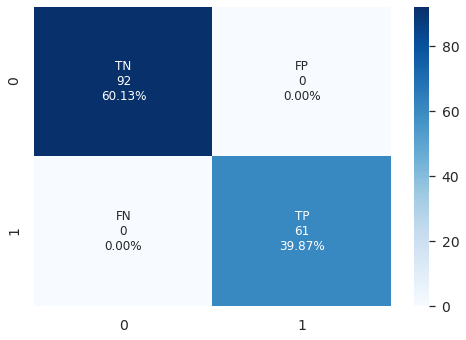

In [ ]:
CMPlot(val_confusion)

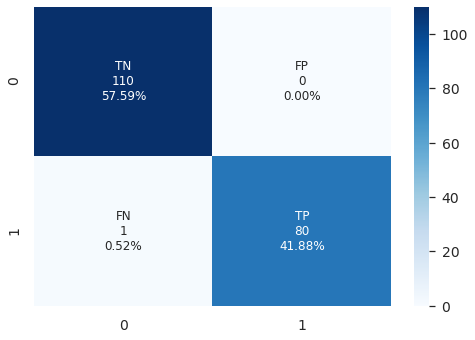

In [ ]:
CMPlot(test_confusion)

## SVM

In [ ]:
clf = svm.SVC(probability=True)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9934640522875817
----------------------------------------------------------------------------------------------------
Precision:  0.9901425050894674
----------------------------------------------------------------------------------------------------
AUC score:  0.9992872416250891
----------------------------------------------------------------------------------------------------
fbeta:  0.9966777408637875


________________________________________________________________________________________________________________________
TEST SET
---------------------------------------------------------------------------------------------

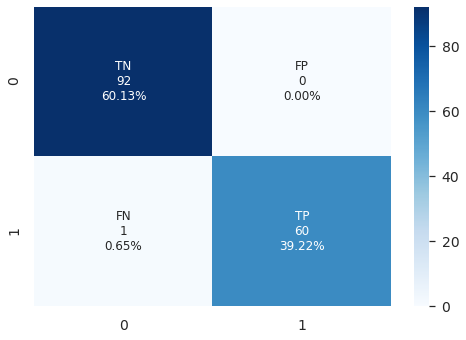

In [ ]:
CMPlot(val_confusion)

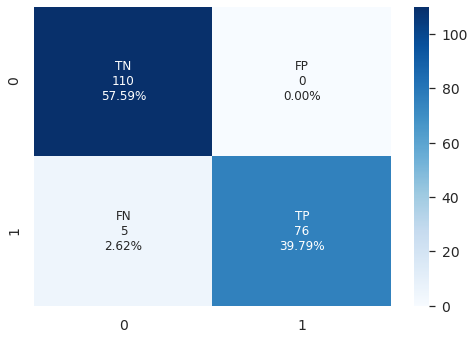

In [ ]:
CMPlot(test_confusion)

##KNN

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9411764705882353
----------------------------------------------------------------------------------------------------
Precision:  0.8777018010383488
----------------------------------------------------------------------------------------------------
AUC score:  0.9910905203136137
----------------------------------------------------------------------------------------------------
fbeta:  0.9076923076923078


________________________________________________________________________________________________________________________
TEST SET
---------------------------------------------------------------------------------------------

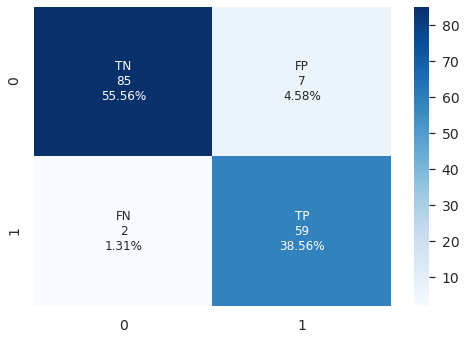

In [ ]:
CMPlot(val_confusion)

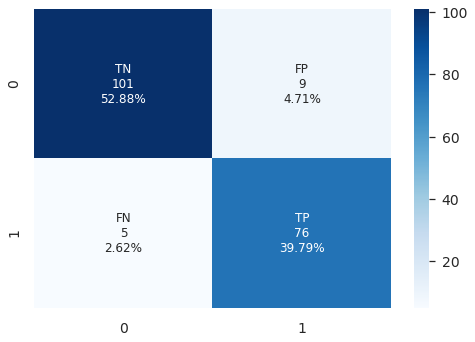

In [ ]:
CMPlot(test_confusion)

## Naive bayes

In [ ]:
clf = MultinomialNB()
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.8954248366013072
----------------------------------------------------------------------------------------------------
Precision:  0.7999907246154313
----------------------------------------------------------------------------------------------------
AUC score:  0.9501069137562366
----------------------------------------------------------------------------------------------------
fbeta:  0.8510638297872339


________________________________________________________________________________________________________________________
TEST SET
---------------------------------------------------------------------------------------------

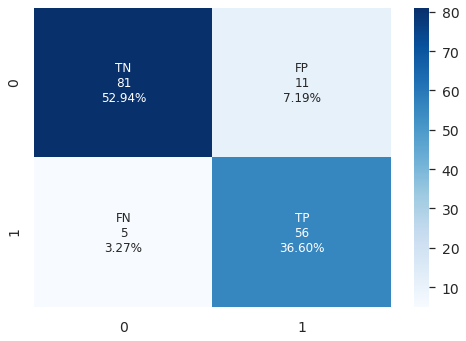

In [ ]:
CMPlot(val_confusion)

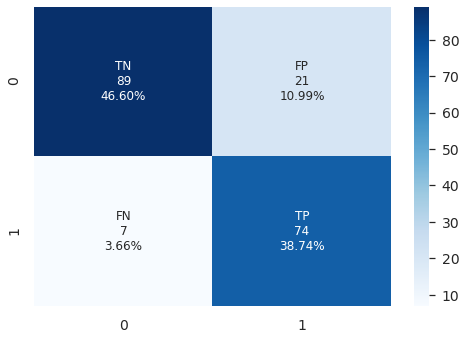

In [ ]:
CMPlot(test_confusion)

## Logistic Regression

In [ ]:
clf = LogisticRegression()
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9934640522875817
----------------------------------------------------------------------------------------------------
Precision:  0.9901425050894674
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  0.9966777408637875


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accurac

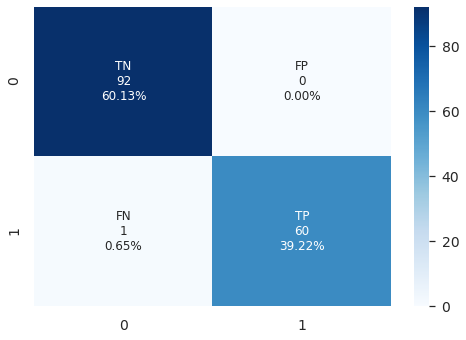

In [ ]:
CMPlot(val_confusion)

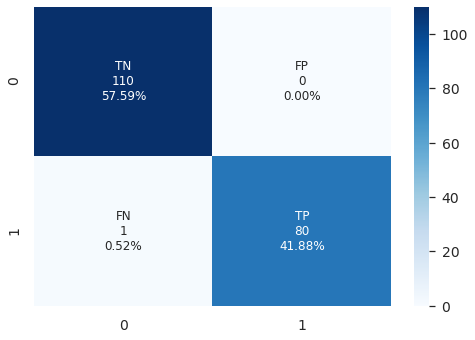

In [ ]:
CMPlot(test_confusion)

---

# Model Tuning

Now I will fine tune the chosen model. For this I use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. I will need to use the entire training set for this. In the code cell below, I will need to implement the following:

- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.



Note that, svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Here I experiented with different kernels such as 'rbf', 'sigmoid', and 'poly' and found that the best-performing kernel is `linear`.

## SVM

In [ ]:
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


# TODO: Initialize the classifier
clf = svm.SVC(random_state = 1,probability=True)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),'fbeta': scorer}
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scoring,refit='fbeta')

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(x_train, y_train)

# Get the estimator
best_clf_svm = grid_fit.best_estimator_

print("–"*100)
print("VALIDATION SET")
print("–"*100)
# Make predictions using the unoptimized and model
predictions = (clf.fit(x_train, y_train)).predict(x_val)
y_pred_prob = clf.predict_proba(x_val)[:,1]
best_predictions = best_clf_svm.predict(x_val)
y_best_pred_prob = best_clf_svm.predict_proba(x_val)[:, 1]
# Report the before-and-afterscores

print("\n")
print ("Unoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(metrics.accuracy_score(y_val, predictions)))
print ("F-beta on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("AUC on validation data: {:.4f}".format(metrics.roc_auc_score(y_val,y_pred_prob)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(metrics.accuracy_score(y_val, best_predictions)))
print ("Final F-beta on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("Final AUC on validation data: {:.4f}".format(metrics.roc_auc_score(y_val,y_best_pred_prob)))



print("–"*100)
print("TEST SET")
print("–"*100)
# Make predictions using the unoptimized and model
predictions = (clf.fit(x_train, y_train)).predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]
best_predictions = best_clf_svm.predict(X_test)
y_best_pred_prob = best_clf_svm.predict_proba(X_test)[:, 1]
# Report the before-and-afterscores

print("\n")
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(metrics.accuracy_score(Y_test, predictions)))
print ("F-beta on testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5)))
print ("AUC on test data: {:.4f}".format(metrics.roc_auc_score(Y_test,y_pred_prob)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(metrics.accuracy_score(Y_test, best_predictions)))
print ("Final F-beta on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5)))
print ("Final AUC on test data: {:.4f}".format(metrics.roc_auc_score(Y_test,y_best_pred_prob)))

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
VALIDATION SET
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


Unoptimized model
------
Accuracy score on validation data: 0.9542
F-beta on validation data: 0.9385
AUC on validation data: 0.9947

Optimized Model
------
Final accuracy score on the validation data: 1.0000
Final F-beta on the validation data: 1.0000
Final AUC on validation data: 1.0000
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
TEST SET
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


Unoptimized model
------
Accuracy score on testing data: 0.9424
F-beta on testing data: 0.9233
AUC on test data: 0.9902

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-beta on the testing data: 1.0000
Final AUC on test data: 1.0000


### Tune Grid

In [ ]:
results = grid_obj.cv_results_
resultsDf = pd.DataFrame(results)
n_resultsDf = pd.concat([resultsDf.drop(['params'], axis=1), resultsDf['params'].apply(pd.Series)], axis=1)
n_resultsDf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_test_fbeta,split1_test_fbeta,split2_test_fbeta,split3_test_fbeta,split4_test_fbeta,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,C,degree,kernel
0,0.008361,0.000913,0.004608,0.000272,1,1,linear,0.993789,0.998268,0.999423,0.996825,0.996537,0.996968,0.001899,56,0.967480,0.983607,0.975410,0.934426,0.950820,0.962348,0.017671,54,0.968468,0.990783,0.960699,0.883534,0.922747,0.945246,0.037858,54,1,1,linear
1,0.008966,0.000162,0.004583,0.000291,1,1,poly,0.996894,1.000000,0.997403,0.995960,0.996825,0.997416,0.001373,49,0.967480,0.983607,0.975410,0.934426,0.950820,0.962348,0.017671,54,0.968468,0.990783,0.960699,0.883534,0.922747,0.945246,0.037858,54,1,1,poly
2,0.017887,0.002956,0.006574,0.001337,1,1,rbf,0.990401,0.993651,0.987879,0.981241,0.989033,0.988441,0.004086,71,0.951220,0.926230,0.901639,0.926230,0.918033,0.924670,0.016026,71,0.934783,0.915493,0.875576,0.895197,0.871369,0.898483,0.023990,71,1,1,rbf
3,0.051354,0.000672,0.008667,0.000337,1,1,sigmoid,0.248730,0.296392,0.201154,0.147475,0.325253,0.243801,0.064066,96,0.292683,0.360656,0.303279,0.221311,0.393443,0.314274,0.059411,76,0.082645,0.074627,0.084388,0.072202,0.056497,0.074072,0.009926,76,1,1,sigmoid
4,0.008248,0.000600,0.004898,0.000850,1,2,linear,0.993789,0.998268,0.999423,0.996825,0.996537,0.996968,0.001899,56,0.967480,0.983607,0.975410,0.934426,0.950820,0.962348,0.017671,54,0.968468,0.990783,0.960699,0.883534,0.922747,0.945246,0.037858,54,1,2,linear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.051822,0.001186,0.007773,0.000162,5,4,sigmoid,0.247883,0.298124,0.201154,0.147475,0.325253,0.243978,0.064342,91,0.292683,0.360656,0.303279,0.221311,0.393443,0.314274,0.059411,76,0.082645,0.074627,0.084388,0.072202,0.056497,0.074072,0.009926,76,5,4,sigmoid
96,0.007034,0.000576,0.004015,0.000081,5,5,linear,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,5,5,linear
97,0.006473,0.001194,0.003960,0.000158,5,5,poly,0.991530,0.993651,1.000000,1.000000,1.000000,0.997036,0.003691,55,0.983740,0.991803,1.000000,1.000000,1.000000,0.995109,0.006511,23,0.990991,0.995475,1.000000,1.000000,1.000000,0.997293,0.003606,24,5,5,poly
98,0.012119,0.000246,0.004741,0.000051,5,5,rbf,0.999435,1.000000,1.000000,0.997691,0.999134,0.999252,0.000849,28,0.983740,1.000000,1.000000,0.975410,0.991803,0.990191,0.009541,39,0.990991,1.000000,1.000000,0.960699,0.995475,0.989433,0.014751,39,5,5,rbf


### Plot

#### C

In [ ]:
# colorMap = {'linear': 'r','poly': 'g','rbf': 'c','sigmoid': 'm'}
# ax = plt.gca()
# for ke in ['linear','poly','rbf','sigmoid']:
# #use plot() method on the dataframe
#     df = n_resultsDf.loc[n_resultsDf['param_kernel'] == ke]
#     df.plot( x = 'C' , y = 'mean_test_AUC', ax = ax , c = colorMap[ke] ,figsize=( 10,10),ylabel = 'metrices',linestyle='dashed' )
#     df.plot( x = 'C' , y = 'mean_test_Accuracy', ax = ax , c = colorMap[ke] ,figsize=( 10,10),ylabel = 'metrices',linestyle='solid')
#     df.plot( x = 'C' , y = 'mean_test_fbeta', ax = ax , c = colorMap[ke] ,figsize=( 10,10),ylabel = 'metrices',linestyle= 'dashdot')

# legend_list = []
# for k,v in colorMap.items():
#     tmp= mpatches.Patch(color=v, label=k)
#     legend_list.append(tmp)

# plt.ylim([0.85, 1.02])
# plt.legend(handles=legend_list)
# plt.show()

#### degree

In [ ]:
# colorMap = {'linear': 'r','poly': 'g','rbf': 'c','sigmoid': 'm'}
# ax = plt.gca()
# for ke in ['linear','poly','rbf','sigmoid']:
# #use plot() method on the dataframe
#     df = n_resultsDf.loc[n_resultsDf['param_kernel'] == ke]
#     # df.plot( x = 'degree' , y = 'mean_test_AUC', ax = ax , c = colorMap[ke] ,figsize=( 10,10),ylabel = 'metrices',linestyle='dashed' )
#     # df.plot( x = 'degree' , y = 'mean_test_Accuracy', ax = ax , c = colorMap[ke] ,figsize=( 10,10),ylabel = 'metrices',linestyle='solid')
#     df.plot( x = 'degree' , y = 'mean_test_fbeta', ax = ax , c = colorMap[ke] ,figsize=( 10,10),ylabel = 'metrices',linestyle= 'dashdot')

# legend_list = []
# for k,v in colorMap.items():
#     tmp= mpatches.Patch(color=v, label=k)
#     legend_list.append(tmp)

# plt.ylim([0.85, 1.02])
# plt.legend(handles=legend_list)
# plt.show()

## Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 2)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   50.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  7.3min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed: 10.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
# Get the estimator
clf = RandomForestClassifier()
best_clf = rf_random.best_estimator_

print("–"*100)
print("VALIDATION SET")
print("–"*100)
# Make predictions using the unoptimized and model
predictions = (clf.fit(x_train, y_train)).predict(x_val)
y_pred_prob = clf.predict_proba(x_val)[:,1]
best_predictions = best_clf.predict(x_val)
y_best_pred_prob = best_clf.predict_proba(x_val)[:, 1]
# Report the before-and-afterscores

print("\n")
print ("Unoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(metrics.accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("AUC on validation data: {:.4f}".format(metrics.roc_auc_score(y_val,y_pred_prob)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(metrics.accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("Final AUC on validation data: {:.4f}".format(metrics.roc_auc_score(y_val,y_best_pred_prob)))



print("–"*100)
print("TEST SET")
print("–"*100)
# Make predictions using the unoptimized and model
predictions = (clf.fit(x_train, y_train)).predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]
best_predictions = best_clf.predict(X_test)
y_best_pred_prob = best_clf.predict_proba(X_test)[:, 1]
# Report the before-and-afterscores

print("\n")
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(metrics.accuracy_score(Y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5)))
print ("AUC on test data: {:.4f}".format(metrics.roc_auc_score(Y_test,y_pred_prob)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(metrics.accuracy_score(Y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5)))
print ("Final AUC on test data: {:.4f}".format(metrics.roc_auc_score(Y_test,y_best_pred_prob)))

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
VALIDATION SET
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


Unoptimized model
------
Accuracy score on validation data: 1.0000
F-score on validation data: 1.0000
AUC on validation data: 1.0000

Optimized Model
------
Final accuracy score on the validation data: 1.0000
Final F-score on the validation data: 1.0000
Final AUC on validation data: 1.0000
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
TEST SET
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000
AUC on test data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
Final AUC on test data: 1.0000


## Logistic Regression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
clf = LogisticRegression(max_iter = 500)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
scorer = make_scorer(f_beta_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = grid, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(x_train, y_train)

# Get the estimator
best_clf_logi = grid_fit.best_estimator_
# summarize results

print("–"*100)
print("VALIDATION SET")
print("–"*100)
# Make predictions using the unoptimized and model
predictions = (clf.fit(x_train, y_train)).predict(x_val)
y_pred_prob = clf.predict_proba(x_val)[:,1]
best_predictions = best_clf_logi.predict(x_val)
y_best_pred_prob = best_clf_logi.predict_proba(x_val)[:, 1]
# Report the before-and-afterscores

print("\n")
print ("Unoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(metrics.accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("AUC on validation data: {:.4f}".format(metrics.roc_auc_score(y_val,y_pred_prob)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(metrics.accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("Final AUC on validation data: {:.4f}".format(metrics.roc_auc_score(y_val,y_best_pred_prob)))



print("–"*100)
print("TEST SET")
print("–"*100)
# Make predictions using the unoptimized and model
predictions = (clf.fit(x_train, y_train)).predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]
best_predictions = best_clf_logi.predict(X_test)
y_best_pred_prob = best_clf_logi.predict_proba(X_test)[:, 1]
# Report the before-and-afterscores

print("\n")
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(metrics.accuracy_score(Y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5)))
print ("AUC on test data: {:.4f}".format(metrics.roc_auc_score(Y_test,y_pred_prob)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(metrics.accuracy_score(Y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5)))
print ("Final AUC on test data: {:.4f}".format(metrics.roc_auc_score(Y_test,y_best_pred_prob)))

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
VALIDATION SET
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


Unoptimized model
------
Accuracy score on validation data: 0.9477
F-score on validation data: 0.9428
AUC on validation data: 0.9941

Optimized Model
------
Final accuracy score on the validation data: 1.0000
Final F-score on the validation data: 1.0000
Final AUC on validation data: 1.0000
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
TEST SET
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


Unoptimized model
------
Accuracy score on testing data: 0.9267
F-score on testing data: 0.9136
AUC on test data: 0.9873

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
Final AUC on test data: 1.0000


## final plot

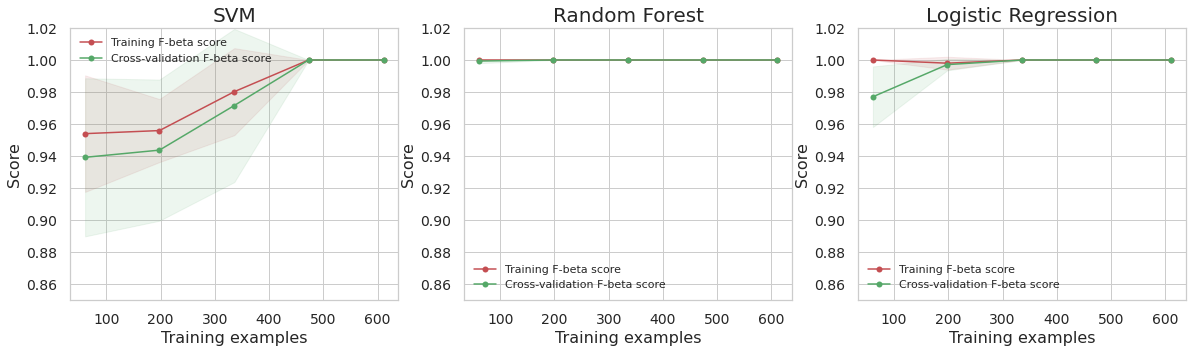

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_ylim([0.85, 1.02])
axes[1].set_ylim([0.85, 1.02])
axes[2].set_ylim([0.85, 1.02])
axes[0].set_title("SVM")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("Score")
axes[2].set_title("Logistic Regression")
axes[2].set_xlabel("Training examples")
axes[2].set_ylabel("Score")

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scorer = make_scorer(f_beta_score)
# For SVM
train_sizes, train_scores, test_scores = \
        learning_curve(best_clf_svm, X_train,Y_train, cv=cv, n_jobs=2,
                       return_times=False, scoring = scorer)
        
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1,
                        color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                label="Training F-beta score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                label="Cross-validation F-beta score")
axes[0].legend(loc="best")


# For Random Forest
train_sizes, train_scores, test_scores = \
        learning_curve(rf_random.best_estimator_, X_train,Y_train, cv=cv, n_jobs=2,
                       return_times=False, scoring = scorer)
        
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[1].fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="r")
axes[1].fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1,
                        color="g")
axes[1].plot(train_sizes, train_scores_mean, 'o-', color="r",
                label="Training F-beta score")
axes[1].plot(train_sizes, test_scores_mean, 'o-', color="g",
                label="Cross-validation F-beta score")
axes[1].legend(loc="best")

# For logistic Regression
train_sizes, train_scores, test_scores = \
        learning_curve(best_clf_logi, X_train,Y_train, cv=cv, n_jobs=2,
                       return_times=False, scoring = scorer)
        
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[2].fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="r")
axes[2].fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1,
                        color="g")
axes[2].plot(train_sizes, train_scores_mean, 'o-', color="r",
                label="Training F-beta score")
axes[2].plot(train_sizes, test_scores_mean, 'o-', color="g",
                label="Cross-validation F-beta score")
axes[2].legend(loc="best")

In this `GridSearchCV` methos, we came up with the best result when the kernel was selected as `linear`.

#Ensembling

In [ ]:
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)

##Ensembling : Stacking
----------Level 0---------- 
###Classifiers: 
Random Forest, SVM (optimized via hyperparameter tuning) ,NB
---------Level 1-----------
###Classifier (Meta-learner/Final Classifier)
Logistic Regression



In [ ]:
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


In [ ]:
def stack_models():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC()
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  level1= LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1)
  return model


In [ ]:
print("Training Set")
print("-"*100)
clf_stack= stack_models()
model_stack = clf_stack.fit(x_train, y_train) # training of stacked model
print("\n")
print("_"*120)
print("VALIDATION SET")  
y_valpred = model_stack.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
y_valpred_prob = clf_stack.predict_proba(x_val)[:, 1]
accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)



print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)


print("\n")
print("_"*120)
print("TEST SET")
Y_pred = model_stack.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)

Y_pred_prob =clf_stack.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
#accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("\n")
print("_"*120)
print("_"*120)
print("CROSS VALIDATION")
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf_stack,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean fbeta: ", cv_fbeta.mean())
print("-"*100)

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Precision:  1.0
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  1.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
-------------------------------------

##Ensembling : Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection


In [ ]:
def model_bagging():
  seed=1075
  np.random.seed()
  classifiers=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  classifiers.append( clf_rf)
  
  #SVM : Optimized
  clf_svm=svm.SVC()
  classifiers.append(clf_svm)
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  classifiers.append( clf_knn)
  #naive bayes
  clf_nb=MultinomialNB()
  classifiers.append(clf_nb)
  #logistic : level 1
  clf_lr= LogisticRegression()
  classifiers.append(clf_lr)
  for _clf in classifiers:
    print("\n")
    print("_"*120)
    print(_clf)
    print("\n")
    print("_"*120)
    kfold = model_selection.KFold(n_splits = 3,
                       random_state =8 )
    bagging_clf = BaggingClassifier(_clf, random_state=seed)
    print("Training Set")
    print("-"*100)
    model_BAG = bagging_clf.fit(x_train, y_train) # training of stacked model
    print("\n")
    print("_"*120)
    print("VALIDATION SET")  
    y_valpred = model_BAG.predict(x_val)
    val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)


    accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred)

    print("-"*100)
    print('Accuracy: ',accuracy)
    print("-"*100)
    print('Precision: ',precision)
    print('-'*100)
    #print('AUC score: ',roc_auc_s)
    print("-"*100)
    print('fbeta: ',fbeta)


    print("\n")
    print("_"*120)
    print("TEST SET")
    Y_pred = model_BAG.predict(X_test)
    test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
    accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
    print("-"*100)
    print('Accuracy: ',accuracy)
    print("-"*100)
    print('Precision: ',precision)
    print('-'*100)
    #print('AUC score: ',roc_auc_s)
    print("-"*100)
    print('fbeta: ',fbeta)
    # Cross validation
    print("\n")
    print("_"*120)
    print("CROSS VALIDATION")
    print("5 FOLD CROSS-VALIDATION RESULT")
    print("_"*120)
    print('\n')
    cv_acc,cv_pre,cv_auc = crossvalidation(bagging_clf,X_train,Y_train ,k=5)
    print("Crossvalidation accuracy list: ",cv_acc)
    print("Mean Accuracy: ", cv_acc.mean())
    print("-"*100)
    print("Crossvalidation precision list: ", cv_pre)
    print("Mean precision: ", cv_pre.mean())
    print("-"*100)
    print("Crossvalidation AUC list: ", cv_auc)
    print("Mean AUC: ", cv_auc.mean())
    print("-"*100)    

In [ ]:
model_bagging()




________________________________________________________________________________________________________________________
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


________________________________________________________________________________________________________________________
Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


TypeError: ignored

UPDATE
rf all 1 , increased
svm , val decrease ; test slight inc ; cross dec
knn ; test dec ; val inc; cross bit dec
nb : test slight inc ;val same ; cross slight dec
lr : val same , test ; increase; cross icnrease

The decreased accuracy of models can be reasoned by

Bagging does not always offer an improvement. For low-variance models that already perform well, bagging can result in a decrease in model performance.
*The evidence, both experimental and theoretical, is that bagging can push a good but unstable procedure a significant step towards optimality. On the other hand, it can slightly degrade the performance of stable procedures.*
— Bagging predictors, 1996.

## Ensembling : Voting
*Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction*

We have used the optimized model for SVM as , hard voting is based on "majority" of votes

In [ ]:
from sklearn.ensemble import VotingClassifier


###HARD VOTING

In [ ]:
def hard_voting():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  clf_lr= LogisticRegression()
  level0.append(('lr', clf_lr))
  maj_voting=VotingClassifier(level0,voting='hard')
  print("Training Set")
  print("-"*100)
  model_vote = maj_voting.fit(x_train, y_train) # training of stacked model
  print("\n")
  print("_"*120)
  print("VALIDATION SET")  
  y_valpred = model_vote.predict(x_val)
  val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)


  accuracy, precision, fbeta = MetricsSci_v(y_val,y_valpred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  #print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)


  print("\n")
  print("_"*120)
  print("TEST SET")
  Y_pred = model_vote.predict(X_test)
  test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
  accuracy, precision,fbeta = MetricsSci_v(Y_test,Y_pred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  #print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)
  # Cross validation
  print("\n")
  print("_"*120)
  print("_"*120)
  print("CROSS VALIDATION")
  print("5 FOLD CROSS-VALIDATION RESULT")
  print("_"*120)
  print('\n')
  cv_acc,cv_pre,cv_fbeta = crossvalidation_v(maj_voting,X_train,Y_train ,k=5)
  print("Crossvalidation accuracy list: ",cv_acc)
  print("Mean Accuracy: ", cv_acc.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean precision: ", cv_pre.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean fbeta: ", cv_fbeta.mean())
  print("-"*100)  
    

In [ ]:
hard_voting()

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9934640522875817
----------------------------------------------------------------------------------------------------
Precision:  0.9901425050894674
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
fbeta:  0.9966777408637875


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
--------

###Soft Voting

In [ ]:
def soft_voting():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  clf_lr= LogisticRegression()
  level0.append(('lr', clf_lr))
  maj_voting=VotingClassifier(level0,voting='soft')
  print("Training Set")
  print("-"*100)
  model_vote = maj_voting.fit(x_train, y_train) # training of stacked model
  print("\n")
  print("_"*120)
  print("VALIDATION SET")  
  y_valpred = model_vote.predict(x_val)
  val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)

  y_valpred_prob = maj_voting.predict_proba(x_val)[:, 1]
  accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)
  #accuracy, precision, fbeta = MetricsSci_2(y_val,y_valpred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)


  print("\n")
  print("_"*120)
  print("TEST SET")
  Y_pred = model_vote.predict(X_test)
  test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)

  Y_pred_prob =maj_voting.predict_proba(X_test)[:, 1]
  accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
  #accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)
  # Cross validation
  print("\n")
  print("_"*120)
  print("_"*120)
  print("CROSS VALIDATION")
  print("5 FOLD CROSS-VALIDATION RESULT")
  print("_"*120)
  print('\n')
  cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(maj_voting,X_train,Y_train ,k=5)
  print("Crossvalidation accuracy list: ",cv_acc)
  print("Mean Accuracy: ", cv_acc.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean precision: ", cv_pre.mean())
  print("-"*100)
  print("Crossvalidation AUC list: ", cv_auc)
  print("Mean AUC: ", cv_auc.mean())
  print("-"*100)
  print("Crossvalidation fbeta list: ", cv_fbeta)
  print("Mean fbeta: ", cv_fbeta.mean())
  print("-"*100)
    

In [ ]:
soft_voting()

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Precision:  1.0
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  1.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
-------------------------------------

# Feature Engineering

##  Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, I will implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

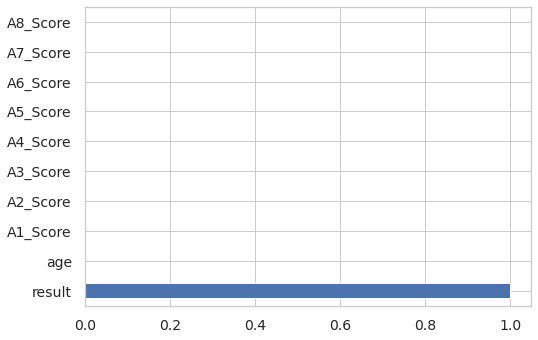

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, Y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

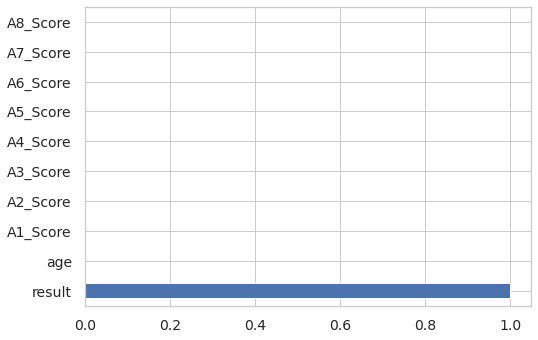

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, Y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

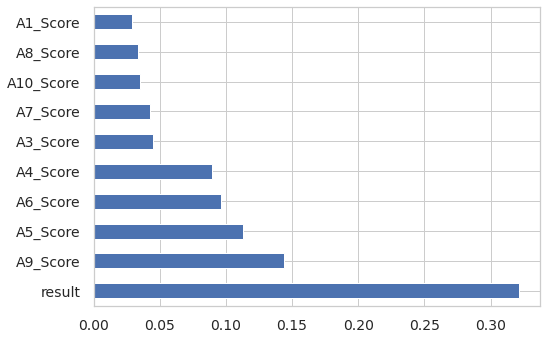

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

* Taking top 5 features

In [ ]:
list(feat_importances.nlargest(5).index)

['result', 'A9_Score', 'A5_Score', 'A6_Score', 'A4_Score']

In [ ]:
X_train = X_train[list(feat_importances.nlargest(5).index)]
X_test = X_test[list(feat_importances.nlargest(5).index)]

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, train_size=0.80, random_state=1)
print("-"*100)
print( 'Training set has {} samples'.format(x_train.shape[0]))
print("-"*100)
print( 'validation set has {} samples'.format(x_val.shape[0]))
print("-"*100)

----------------------------------------------------------------------------------------------------
Training set has 611 samples
----------------------------------------------------------------------------------------------------
validation set has 153 samples
----------------------------------------------------------------------------------------------------


### Modelling

#### Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=5, random_state=1)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Precision:  1.0
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  1.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
-------------------------------------

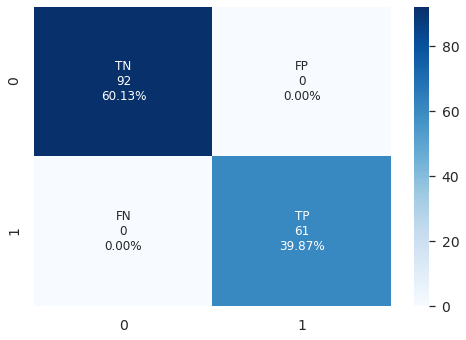

In [ ]:
CMPlot(val_confusion)

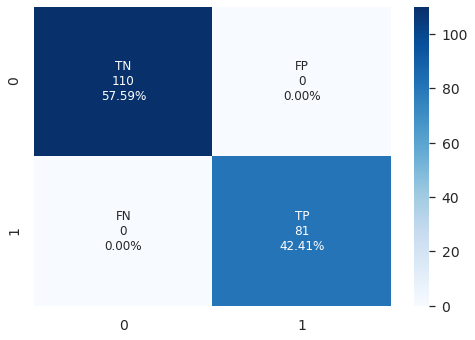

In [ ]:
CMPlot(test_confusion)

#### SVM

In [ ]:
clf = svm.SVC(probability=True)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)



Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.954248366013072
----------------------------------------------------------------------------------------------------
Precision:  0.90908431061478
----------------------------------------------------------------------------------------------------
AUC score:  0.9946543121881682
----------------------------------------------------------------------------------------------------
fbeta:  0.9385113268608413


________________________________________________________________________________________________________________________
TEST SET
------------------------------------------------------------------------------------------------

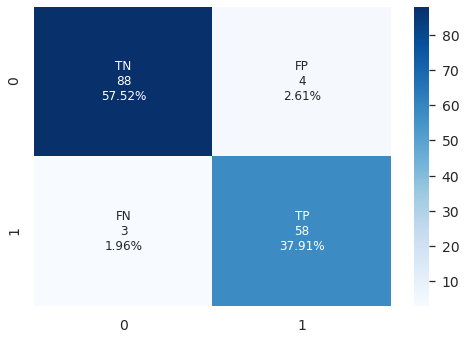

In [ ]:
CMPlot(val_confusion)

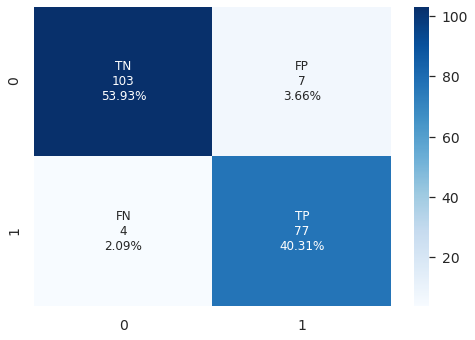

In [ ]:
CMPlot(test_confusion)

####KNN

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9738562091503268
----------------------------------------------------------------------------------------------------
Precision:  0.9543119276051627
----------------------------------------------------------------------------------------------------
AUC score:  0.994743406985032
----------------------------------------------------------------------------------------------------
fbeta:  0.9764309764309764


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------

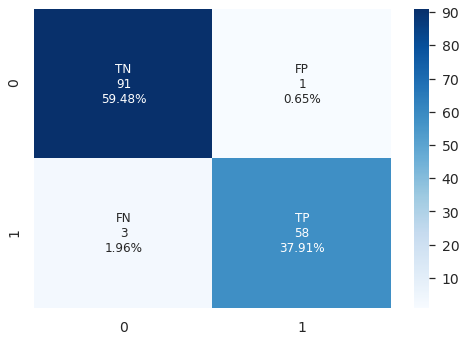

In [ ]:
CMPlot(val_confusion)

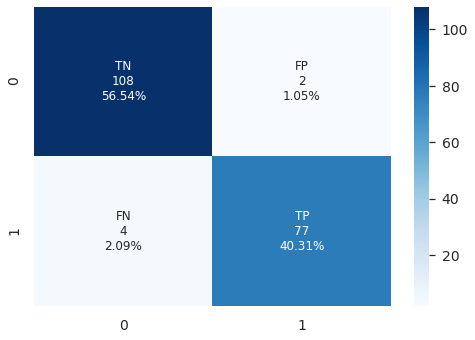

In [ ]:
CMPlot(test_confusion)

#### Naive bayes

In [ ]:
clf = MultinomialNB()
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)



Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.5816993464052288
----------------------------------------------------------------------------------------------------
Precision:  0.39869281045751637
----------------------------------------------------------------------------------------------------
AUC score:  0.7744119743406985
----------------------------------------------------------------------------------------------------
fbeta:  0.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accura

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


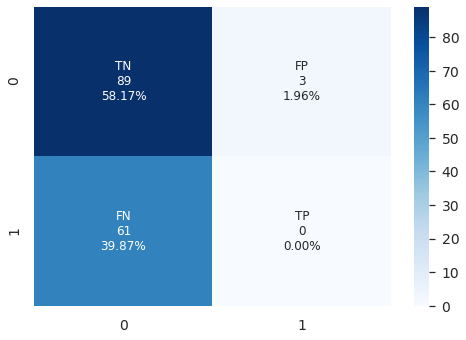

In [ ]:
CMPlot(val_confusion)

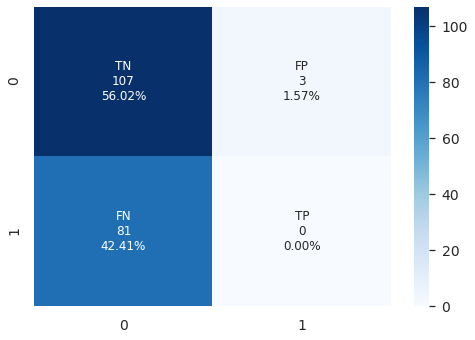

In [ ]:
CMPlot(test_confusion)

#### Logistic Regression

In [ ]:
clf = LogisticRegression()
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9477124183006536
----------------------------------------------------------------------------------------------------
Precision:  0.9040328922158842
----------------------------------------------------------------------------------------------------
AUC score:  0.994119743406985
----------------------------------------------------------------------------------------------------
fbeta:  0.9427609427609428


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------

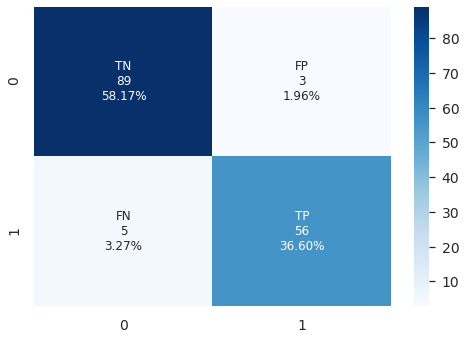

In [ ]:
CMPlot(val_confusion)

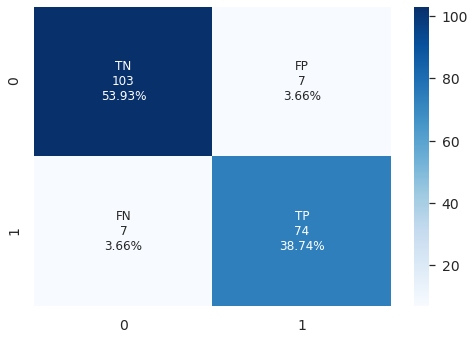

In [ ]:
CMPlot(test_confusion)

#Ensembling

In [ ]:
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)

Crossvalidation accuracy list:  [0.96078431 0.94771242 0.87581699 0.92810458 0.92763158]
Mean Accuracy:  0.9280099759201926
----------------------------------------------------------------------------------------------------
Crossvalidation precision list:  [0.96363636 0.92982456 0.85454545 0.8852459  0.88333333]
Mean precision:  0.9033171229116009
----------------------------------------------------------------------------------------------------
Crossvalidation AUC list:  [0.99269006 0.99451754 0.97205082 0.9923775  0.98947368]
Mean AUC:  0.9882219197418834
----------------------------------------------------------------------------------------------------
Crossvalidation fbeta list:  [0.9566787  0.92982456 0.84532374 0.89403974 0.89225589]
Mean AUC:  0.9036245260253887
----------------------------------------------------------------------------------------------------


##Ensembling : Stacking
----------Level 0---------- 
###Classifiers: 
Random Forest, SVM (optimized via hyperparameter tuning) ,NB
---------Level 1-----------
###Classifier (Meta-learner/Final Classifier)
Logistic Regression



In [ ]:
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


In [ ]:
def stack_models():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC()
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  level1= LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1)
  return model


In [ ]:
print("Training Set")
print("-"*100)
clf_stack= stack_models()
model_stack = clf_stack.fit(x_train, y_train) # training of stacked model
print("\n")
print("_"*120)
print("VALIDATION SET")  
y_valpred = model_stack.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
y_valpred_prob = clf_stack.predict_proba(x_val)[:, 1]
accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)



print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)


print("\n")
print("_"*120)
print("TEST SET")
Y_pred = model_stack.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)

Y_pred_prob =clf_stack.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
#accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("\n")
print("_"*120)
print("_"*120)
print("CROSS VALIDATION")
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf_stack,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean fbeta: ", cv_fbeta.mean())
print("-"*100)

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Precision:  1.0
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  1.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
-------------------------------------

##Ensembling : Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection


In [ ]:
def model_bagging():
  seed=1075
  np.random.seed()
  classifiers=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  classifiers.append( clf_rf)
  
  #SVM : Optimized
  clf_svm=svm.SVC()
  classifiers.append(clf_svm)
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  classifiers.append( clf_knn)
  #naive bayes
  clf_nb=MultinomialNB()
  classifiers.append(clf_nb)
  #logistic : level 1
  clf_lr= LogisticRegression()
  classifiers.append(clf_lr)
  for _clf in classifiers:
    print("\n")
    print("_"*120)
    print(_clf)
    print("\n")
    print("_"*120)
    kfold = model_selection.KFold(n_splits = 3,
                       random_state =8 )
    bagging_clf = BaggingClassifier(_clf, random_state=seed)
    print("Training Set")
    print("-"*100)
    model_BAG = bagging_clf.fit(x_train, y_train) # training of stacked model
    print("\n")
    print("_"*120)
    print("VALIDATION SET")  
    y_valpred = model_BAG.predict(x_val)
    val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)


    accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred)

    print("-"*100)
    print('Accuracy: ',accuracy)
    print("-"*100)
    print('Precision: ',precision)
    print('-'*100)
    #print('AUC score: ',roc_auc_s)
    print("-"*100)
    print('fbeta: ',fbeta)


    print("\n")
    print("_"*120)
    print("TEST SET")
    Y_pred = model_BAG.predict(X_test)
    test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
    accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
    print("-"*100)
    print('Accuracy: ',accuracy)
    print("-"*100)
    print('Precision: ',precision)
    print('-'*100)
    #print('AUC score: ',roc_auc_s)
    print("-"*100)
    print('fbeta: ',fbeta)
    # Cross validation
    print("\n")
    print("_"*120)
    print("CROSS VALIDATION")
    print("5 FOLD CROSS-VALIDATION RESULT")
    print("_"*120)
    print('\n')
    cv_acc,cv_pre,cv_auc = crossvalidation(bagging_clf,X_train,Y_train ,k=5)
    print("Crossvalidation accuracy list: ",cv_acc)
    print("Mean Accuracy: ", cv_acc.mean())
    print("-"*100)
    print("Crossvalidation precision list: ", cv_pre)
    print("Mean precision: ", cv_pre.mean())
    print("-"*100)
    print("Crossvalidation AUC list: ", cv_auc)
    print("Mean AUC: ", cv_auc.mean())
    print("-"*100)    

UPDATE
rf all 1 , increased
svm , val decrease ; test slight inc ; cross dec
knn ; test dec ; val inc; cross bit dec
nb : test slight inc ;val same ; cross slight dec
lr : val same , test ; increase; cross icnrease

The decreased accuracy of models can be reasoned by

Bagging does not always offer an improvement. For low-variance models that already perform well, bagging can result in a decrease in model performance.
*The evidence, both experimental and theoretical, is that bagging can push a good but unstable procedure a significant step towards optimality. On the other hand, it can slightly degrade the performance of stable procedures.*
— Bagging predictors, 1996.

## Ensembling : Voting
*Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction*

We have used the optimized model for SVM as , hard voting is based on "majority" of votes

In [ ]:
from sklearn.ensemble import VotingClassifier


###HARD VOTING

In [ ]:
def hard_voting():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  clf_lr= LogisticRegression()
  level0.append(('lr', clf_lr))
  maj_voting=VotingClassifier(level0,voting='hard')
  print("Training Set")
  print("-"*100)
  model_vote = maj_voting.fit(x_train, y_train) # training of stacked model
  print("\n")
  print("_"*120)
  print("VALIDATION SET")  
  y_valpred = model_vote.predict(x_val)
  val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)


  accuracy, precision, fbeta = MetricsSci_v(y_val,y_valpred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  #print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)


  print("\n")
  print("_"*120)
  print("TEST SET")
  Y_pred = model_vote.predict(X_test)
  test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
  accuracy, precision,fbeta = MetricsSci_v(Y_test,Y_pred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  #print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)
  # Cross validation
  print("\n")
  print("_"*120)
  print("_"*120)
  print("CROSS VALIDATION")
  print("5 FOLD CROSS-VALIDATION RESULT")
  print("_"*120)
  print('\n')
  cv_acc,cv_pre,cv_fbeta = crossvalidation_v(maj_voting,X_train,Y_train ,k=5)
  print("Crossvalidation accuracy list: ",cv_acc)
  print("Mean Accuracy: ", cv_acc.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean precision: ", cv_pre.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean fbeta: ", cv_fbeta.mean())
  print("-"*100)  
    

In [ ]:
hard_voting()

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9738562091503268
----------------------------------------------------------------------------------------------------
Precision:  0.9543119276051627
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
fbeta:  0.9764309764309764


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9685863874

###Soft Voting

In [ ]:
def soft_voting():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  clf_lr= LogisticRegression()
  level0.append(('lr', clf_lr))
  maj_voting=VotingClassifier(level0,voting='soft')
  print("Training Set")
  print("-"*100)
  model_vote = maj_voting.fit(x_train, y_train) # training of stacked model
  print("\n")
  print("_"*120)
  print("VALIDATION SET")  
  y_valpred = model_vote.predict(x_val)
  val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)

  y_valpred_prob = maj_voting.predict_proba(x_val)[:, 1]
  accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)
  #accuracy, precision, fbeta = MetricsSci_2(y_val,y_valpred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)


  print("\n")
  print("_"*120)
  print("TEST SET")
  Y_pred = model_vote.predict(X_test)
  test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)

  Y_pred_prob =maj_voting.predict_proba(X_test)[:, 1]
  accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
  #accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)
  # Cross validation
  print("\n")
  print("_"*120)
  print("_"*120)
  print("CROSS VALIDATION")
  print("5 FOLD CROSS-VALIDATION RESULT")
  print("_"*120)
  print('\n')
  cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(maj_voting,X_train,Y_train ,k=5)
  print("Crossvalidation accuracy list: ",cv_acc)
  print("Mean Accuracy: ", cv_acc.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean precision: ", cv_pre.mean())
  print("-"*100)
  print("Crossvalidation AUC list: ", cv_auc)
  print("Mean AUC: ", cv_auc.mean())
  print("-"*100)
  print("Crossvalidation fbeta list: ", cv_fbeta)
  print("Mean fbeta: ", cv_fbeta.mean())
  print("-"*100)
    

In [ ]:
soft_voting()

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9738562091503268
----------------------------------------------------------------------------------------------------
Precision:  0.9543119276051627
----------------------------------------------------------------------------------------------------
AUC score:  0.999287241625089
----------------------------------------------------------------------------------------------------
fbeta:  0.9764309764309764


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------

#Boruta

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
#rf = RandomForestClassifier()

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
#feat_selector = BorutaPy(rf,verbose=2)
# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.values, Y_train.values)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=63, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB9072FDAF0,
                                          verbose=0, warm_start=F

In [ ]:
green_area = X_train.columns[feat_selector.support_].to_list()
blue_area = X_train.columns[feat_selector.support_weak_].to_list()
print("-"*100)
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
print("-"*100)

----------------------------------------------------------------------------------------------------
features in the green area: ['result', 'A9_Score', 'A5_Score', 'A6_Score', 'A4_Score']
features in the blue area: []
----------------------------------------------------------------------------------------------------


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(featuresDf, labelDf, train_size=0.80, random_state=1)
print("-"*100)
print( 'Training set has {} samples'.format(X_train.shape[0]))
print("-"*100)
print( 'Testing set has {} samples'.format(X_test.shape[0]))
print("-"*100)

----------------------------------------------------------------------------------------------------
Training set has 764 samples
----------------------------------------------------------------------------------------------------
Testing set has 191 samples
----------------------------------------------------------------------------------------------------


In [ ]:
X_train = X_train[green_area]
X_test = X_test[green_area]

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, train_size=0.80, random_state=1)
print("-"*100)
print( 'Training set has {} samples'.format(x_train.shape[0]))
print("-"*100)
print( 'validation set has {} samples'.format(x_val.shape[0]))
print("-"*100)

----------------------------------------------------------------------------------------------------
Training set has 611 samples
----------------------------------------------------------------------------------------------------
validation set has 153 samples
----------------------------------------------------------------------------------------------------


In [ ]:
X_train

,result,A9_Score,A5_Score,A6_Score,A4_Score
623,0.5,0,0,0,1
875,0.6,0,0,1,1
723,0.9,1,1,1,1
223,0.5,0,1,1,0
651,0.3,0,0,0,0
...,...,...,...,...,...
767,0.6,0,0,0,1
72,0.8,1,1,1,1
908,1.0,1,1,1,1
235,0.9,1,1,1,1


### Modelling

#### Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=5, random_state=1)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Precision:  1.0
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  1.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
-------------------------------------

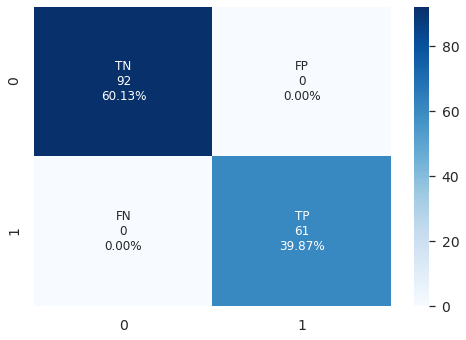

In [ ]:
CMPlot(val_confusion)

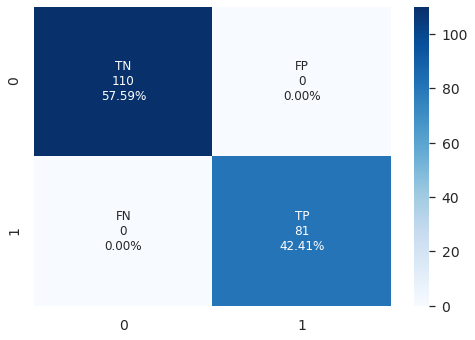

In [ ]:
CMPlot(test_confusion)

#### SVM

In [ ]:
clf = svm.SVC(probability=True)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.954248366013072
----------------------------------------------------------------------------------------------------
Precision:  0.90908431061478
----------------------------------------------------------------------------------------------------
AUC score:  0.9946543121881682
----------------------------------------------------------------------------------------------------
fbeta:  0.9385113268608413


________________________________________________________________________________________________________________________
TEST SET
------------------------------------------------------------------------------------------------

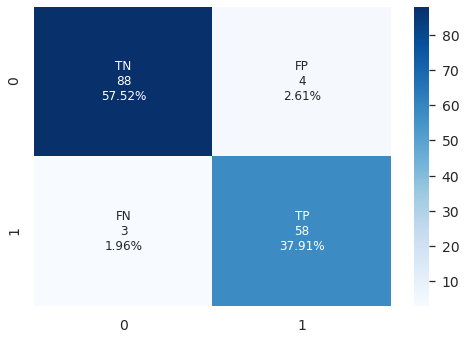

In [ ]:
CMPlot(val_confusion)

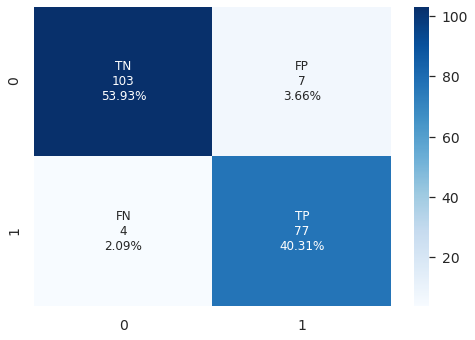

In [ ]:
CMPlot(test_confusion)

####KNN

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9738562091503268
----------------------------------------------------------------------------------------------------
Precision:  0.9543119276051627
----------------------------------------------------------------------------------------------------
AUC score:  0.994743406985032
----------------------------------------------------------------------------------------------------
fbeta:  0.9764309764309764


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------

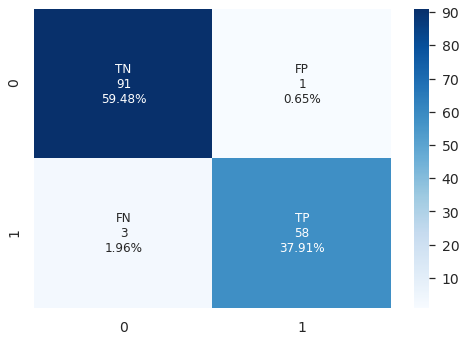

In [ ]:
CMPlot(val_confusion)

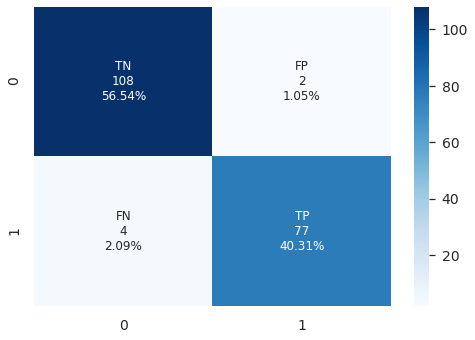

In [ ]:
CMPlot(test_confusion)

#### Naive bayes

In [ ]:
clf = MultinomialNB()
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.5816993464052288
----------------------------------------------------------------------------------------------------
Precision:  0.39869281045751637
----------------------------------------------------------------------------------------------------
AUC score:  0.7744119743406985
----------------------------------------------------------------------------------------------------
fbeta:  0.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accura

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


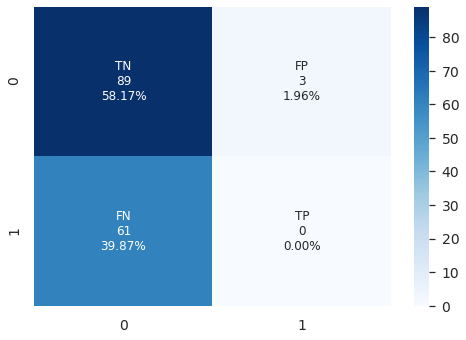

In [ ]:
CMPlot(val_confusion)

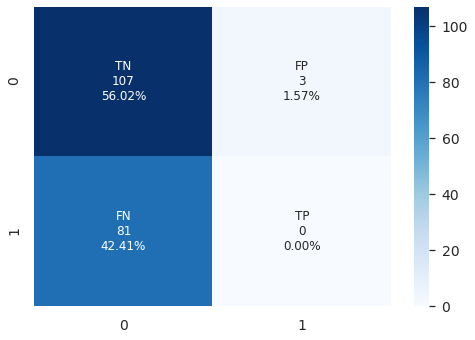

In [ ]:
CMPlot(test_confusion)

#### Logistic Regression

In [ ]:
clf = LogisticRegression()
print("Training Set")
print("-"*100)
clf.fit(x_train, y_train)
print("\n")
print("_"*120)
print("VALIDATION SET")
y_valpred = clf.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
# predict probabilities
# keep probabilities for the positive outcome only
y_valpred_prob = clf.predict_proba(x_val)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(y_val,y_valpred,y_valpred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)

print("\n")
print("_"*120)
print("TEST SET")
Y_pred = clf.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
# predict probabilities
# keep probabilities for the positive outcome only
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci(Y_test,Y_pred,Y_pred_prob)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)


Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9477124183006536
----------------------------------------------------------------------------------------------------
Precision:  0.9040328922158842
----------------------------------------------------------------------------------------------------
AUC score:  0.994119743406985
----------------------------------------------------------------------------------------------------
fbeta:  0.9427609427609428


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------

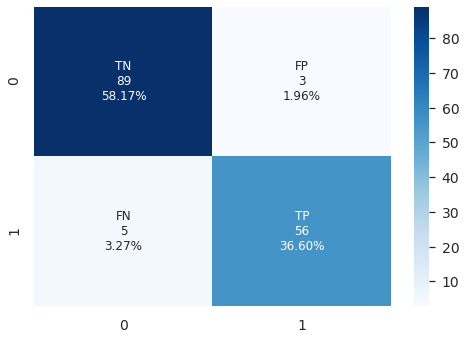

In [ ]:
CMPlot(val_confusion)

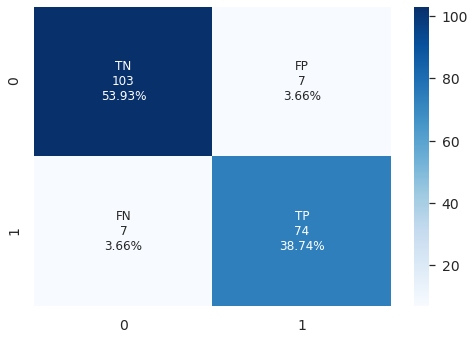

In [ ]:
CMPlot(test_confusion)

#Ensembling

In [ ]:
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean AUC: ", cv_fbeta.mean())
print("-"*100)

Crossvalidation accuracy list:  [0.96078431 0.94771242 0.87581699 0.92810458 0.92763158]
Mean Accuracy:  0.9280099759201926
----------------------------------------------------------------------------------------------------
Crossvalidation precision list:  [0.96363636 0.92982456 0.85454545 0.8852459  0.88333333]
Mean precision:  0.9033171229116009
----------------------------------------------------------------------------------------------------
Crossvalidation AUC list:  [0.99269006 0.99451754 0.97205082 0.9923775  0.98947368]
Mean AUC:  0.9882219197418834
----------------------------------------------------------------------------------------------------
Crossvalidation fbeta list:  [0.9566787  0.92982456 0.84532374 0.89403974 0.89225589]
Mean AUC:  0.9036245260253887
----------------------------------------------------------------------------------------------------


##Ensembling : Stacking
----------Level 0---------- 
###Classifiers: 
Random Forest, SVM (optimized via hyperparameter tuning) ,NB
---------Level 1-----------
###Classifier (Meta-learner/Final Classifier)
Logistic Regression



In [ ]:
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


In [ ]:
def stack_models():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC()
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  level1= LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1)
  return model


In [ ]:
print("Training Set")
print("-"*100)
clf_stack= stack_models()
model_stack = clf_stack.fit(x_train, y_train) # training of stacked model
print("\n")
print("_"*120)
print("VALIDATION SET")  
y_valpred = model_stack.predict(x_val)
val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)
y_valpred_prob = clf_stack.predict_proba(x_val)[:, 1]
accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)



print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)


print("\n")
print("_"*120)
print("TEST SET")
Y_pred = model_stack.predict(X_test)
test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)

Y_pred_prob =clf_stack.predict_proba(X_test)[:, 1]
accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
#accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
print("-"*100)
print('Accuracy: ',accuracy)
print("-"*100)
print('Precision: ',precision)
print('-'*100)
print('AUC score: ',roc_auc_s)
print("-"*100)
print('fbeta: ',fbeta)
# Cross validation
print("\n")
print("_"*120)
print("\n")
print("_"*120)
print("_"*120)
print("CROSS VALIDATION")
print("5 FOLD CROSS-VALIDATION RESULT")
print("_"*120)
print('\n')
cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(clf_stack,X_train,Y_train ,k=5)
print("Crossvalidation accuracy list: ",cv_acc)
print("Mean Accuracy: ", cv_acc.mean())
print("-"*100)
print("Crossvalidation precision list: ", cv_pre)
print("Mean precision: ", cv_pre.mean())
print("-"*100)
print("Crossvalidation AUC list: ", cv_auc)
print("Mean AUC: ", cv_auc.mean())
print("-"*100)
print("Crossvalidation fbeta list: ", cv_fbeta)
print("Mean fbeta: ", cv_fbeta.mean())
print("-"*100)

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Precision:  1.0
----------------------------------------------------------------------------------------------------
AUC score:  1.0
----------------------------------------------------------------------------------------------------
fbeta:  1.0


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
-------------------------------------

##Ensembling : Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection


In [ ]:
def model_bagging():
  seed=1075
  np.random.seed()
  classifiers=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  classifiers.append( clf_rf)
  
  #SVM : Optimized
  clf_svm=svm.SVC()
  classifiers.append(clf_svm)
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  classifiers.append( clf_knn)
  #naive bayes
  clf_nb=MultinomialNB()
  classifiers.append(clf_nb)
  #logistic : level 1
  clf_lr= LogisticRegression()
  classifiers.append(clf_lr)
  for _clf in classifiers:
    print("\n")
    print("_"*120)
    print(_clf)
    print("\n")
    print("_"*120)
    kfold = model_selection.KFold(n_splits = 3,
                       random_state =8 )
    bagging_clf = BaggingClassifier(_clf, random_state=seed)
    print("Training Set")
    print("-"*100)
    model_BAG = bagging_clf.fit(x_train, y_train) # training of stacked model
    print("\n")
    print("_"*120)
    print("VALIDATION SET")  
    y_valpred = model_BAG.predict(x_val)
    val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)


    accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred)

    print("-"*100)
    print('Accuracy: ',accuracy)
    print("-"*100)
    print('Precision: ',precision)
    print('-'*100)
    #print('AUC score: ',roc_auc_s)
    print("-"*100)
    print('fbeta: ',fbeta)


    print("\n")
    print("_"*120)
    print("TEST SET")
    Y_pred = model_BAG.predict(X_test)
    test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
    accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
    print("-"*100)
    print('Accuracy: ',accuracy)
    print("-"*100)
    print('Precision: ',precision)
    print('-'*100)
    #print('AUC score: ',roc_auc_s)
    print("-"*100)
    print('fbeta: ',fbeta)
    # Cross validation
    print("\n")
    print("_"*120)
    print("CROSS VALIDATION")
    print("5 FOLD CROSS-VALIDATION RESULT")
    print("_"*120)
    print('\n')
    cv_acc,cv_pre,cv_auc = crossvalidation(bagging_clf,X_train,Y_train ,k=5)
    print("Crossvalidation accuracy list: ",cv_acc)
    print("Mean Accuracy: ", cv_acc.mean())
    print("-"*100)
    print("Crossvalidation precision list: ", cv_pre)
    print("Mean precision: ", cv_pre.mean())
    print("-"*100)
    print("Crossvalidation AUC list: ", cv_auc)
    print("Mean AUC: ", cv_auc.mean())
    print("-"*100)    

UPDATE
rf all 1 , increased
svm , val decrease ; test slight inc ; cross dec
knn ; test dec ; val inc; cross bit dec
nb : test slight inc ;val same ; cross slight dec
lr : val same , test ; increase; cross icnrease

The decreased accuracy of models can be reasoned by

Bagging does not always offer an improvement. For low-variance models that already perform well, bagging can result in a decrease in model performance.
*The evidence, both experimental and theoretical, is that bagging can push a good but unstable procedure a significant step towards optimality. On the other hand, it can slightly degrade the performance of stable procedures.*
— Bagging predictors, 1996.

## Ensembling : Voting
*Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction*

We have used the optimized model for SVM as , hard voting is based on "majority" of votes

In [ ]:
from sklearn.ensemble import VotingClassifier


###HARD VOTING

In [ ]:
def hard_voting():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  clf_lr= LogisticRegression()
  level0.append(('lr', clf_lr))
  maj_voting=VotingClassifier(level0,voting='hard')
  print("Training Set")
  print("-"*100)
  model_vote = maj_voting.fit(x_train, y_train) # training of stacked model
  print("\n")
  print("_"*120)
  print("VALIDATION SET")  
  y_valpred = model_vote.predict(x_val)
  val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)


  accuracy, precision, fbeta = MetricsSci_v(y_val,y_valpred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  #print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)


  print("\n")
  print("_"*120)
  print("TEST SET")
  Y_pred = model_vote.predict(X_test)
  test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)
  accuracy, precision,fbeta = MetricsSci_v(Y_test,Y_pred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  #print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)
  # Cross validation
  print("\n")
  print("_"*120)
  print("_"*120)
  print("CROSS VALIDATION")
  print("5 FOLD CROSS-VALIDATION RESULT")
  print("_"*120)
  print('\n')
  cv_acc,cv_pre,cv_fbeta = crossvalidation_v(maj_voting,X_train,Y_train ,k=5)
  print("Crossvalidation accuracy list: ",cv_acc)
  print("Mean Accuracy: ", cv_acc.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean precision: ", cv_pre.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean fbeta: ", cv_fbeta.mean())
  print("-"*100)  
    

In [ ]:
hard_voting()

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9738562091503268
----------------------------------------------------------------------------------------------------
Precision:  0.9543119276051627
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
fbeta:  0.9764309764309764


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9685863874

###Soft Voting

In [ ]:
def soft_voting():
  level0=[]
  #Random Forest
  clf_rf=RandomForestClassifier(n_estimators=5, random_state=1)
  level0.append(('rf', clf_rf))
  
  #SVM : Optimized
  clf_svm=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
  level0.append(('svm', clf_svm))
  #KNN
  clf_knn=neighbors.KNeighborsClassifier(n_neighbors=10)
  level0.append(('knn', clf_knn))
  #naive bayes
  clf_nb=MultinomialNB()
  level0.append(('nb', clf_nb))
  #logistic : level 1
  clf_lr= LogisticRegression()
  level0.append(('lr', clf_lr))
  maj_voting=VotingClassifier(level0,voting='soft')
  print("Training Set")
  print("-"*100)
  model_vote = maj_voting.fit(x_train, y_train) # training of stacked model
  print("\n")
  print("_"*120)
  print("VALIDATION SET")  
  y_valpred = model_vote.predict(x_val)
  val_confusion, cmDic = ConfusionMatrix(y_val,y_valpred)

  y_valpred_prob = maj_voting.predict_proba(x_val)[:, 1]
  accuracy, precision,roc_auc_s,fbeta = MetricsSci_2(y_val,y_valpred,y_valpred_prob)
  #accuracy, precision, fbeta = MetricsSci_2(y_val,y_valpred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)


  print("\n")
  print("_"*120)
  print("TEST SET")
  Y_pred = model_vote.predict(X_test)
  test_confusion, cmDic = ConfusionMatrix(Y_test,Y_pred)

  Y_pred_prob =maj_voting.predict_proba(X_test)[:, 1]
  accuracy, precision, roc_auc_s, fbeta = MetricsSci_2(Y_test,Y_pred,Y_pred_prob)
  #accuracy, precision,fbeta = MetricsSci_2(Y_test,Y_pred)
  print("-"*100)
  print('Accuracy: ',accuracy)
  print("-"*100)
  print('Precision: ',precision)
  print('-'*100)
  print('AUC score: ',roc_auc_s)
  print("-"*100)
  print('fbeta: ',fbeta)
  # Cross validation
  print("\n")
  print("_"*120)
  print("_"*120)
  print("CROSS VALIDATION")
  print("5 FOLD CROSS-VALIDATION RESULT")
  print("_"*120)
  print('\n')
  cv_acc,cv_pre,cv_auc,cv_fbeta = crossvalidation(maj_voting,X_train,Y_train ,k=5)
  print("Crossvalidation accuracy list: ",cv_acc)
  print("Mean Accuracy: ", cv_acc.mean())
  print("-"*100)
  print("Crossvalidation precision list: ", cv_pre)
  print("Mean precision: ", cv_pre.mean())
  print("-"*100)
  print("Crossvalidation AUC list: ", cv_auc)
  print("Mean AUC: ", cv_auc.mean())
  print("-"*100)
  print("Crossvalidation fbeta list: ", cv_fbeta)
  print("Mean fbeta: ", cv_fbeta.mean())
  print("-"*100)
    

In [ ]:
soft_voting()

Training Set
----------------------------------------------------------------------------------------------------


________________________________________________________________________________________________________________________
VALIDATION SET
----------------------------------------------------------------------------------------------------
Accuracy:  0.9738562091503268
----------------------------------------------------------------------------------------------------
Precision:  0.9543119276051627
----------------------------------------------------------------------------------------------------
AUC score:  0.999287241625089
----------------------------------------------------------------------------------------------------
fbeta:  0.9764309764309764


________________________________________________________________________________________________________________________
TEST SET
----------------------------------------------------------------------------------------------